# Apresentação dos Dados

## Importação das bibliotecas necessárias

In [1]:
import fastf1
from fastf1 import plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter, MultipleLocator
import json

CACHE_DIR = './fastf1_cache'
if not os.path.exists(CACHE_DIR):
    os.makedirs(CACHE_DIR)
print(f"FastF1 cache enabled at: {os.path.abspath(CACHE_DIR)}")


BASE_PLOT_DIR = './f1_plots'
if not os.path.exists(BASE_PLOT_DIR):
    os.makedirs(BASE_PLOT_DIR)
print(f"Base directory for saving plots: {os.path.abspath(BASE_PLOT_DIR)}")

COMPOUND_COLORS = fastf1.plotting.COMPOUND_COLORS


FastF1 cache enabled at: c:\Users\mpoli\Desktop\UFOP\9 PERIODO\TCC\Scripts\fastf1_cache
Base directory for saving plots: c:\Users\mpoli\Desktop\UFOP\9 PERIODO\TCC\Scripts\f1_plots


C:\Users\mpoli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\plotting\__init__.py:84: FutureWarning: INCOMPATIBLE with 2025 season! COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"INCOMPATIBLE with 2025 season! {name} is deprecated "


## Escolha dos Dados

Aqui, escolhemos recolher os dados apenas de uma única pista, o grande prêmio do Bahrein. É uma pista que tem um asfalto abrasivo, pneus mais duros e sem incidência de chuva. Tem uma grande variação de corridas com e sem safety car e é uma boa pista para ultrapassagem, além de ter participado do calendário em todos esses anos.

Separamos os dados em resultados, voltas e climáticos.

In [2]:
start_year_analysis = 2019
end_year_analysis = 2026
target_gp_name = 'Austrian Grand Prix'

all_results_data_by_year = {}
all_laps_data_by_year = {}
all_weather_data_by_year = {}
date = {}


print(f"\n--- Starting comprehensive data collection for {target_gp_name} from {start_year_analysis} to {end_year_analysis-1} ---")

for year in range(start_year_analysis, end_year_analysis):
    print(f"\n--- Collecting data for {target_gp_name} in Season: {year} ---")
    schedule = fastf1.get_event_schedule(year)
    target_event = schedule[schedule['EventName'].str.contains(target_gp_name, case=False, na=False)]

    if target_event.empty:
        print(f"  {target_gp_name} not found in {year} schedule, skipping.")
        continue
    
    target_race_round_row = target_event[target_event['EventFormat'].isin(['conventional', 'sprint', 'sprint_shootout', 'sprint_qualifying'])]
        
    if target_race_round_row.empty:
        print(f"  No 'conventional' or 'sprint' race event found for {target_gp_name} in {year}, skipping.")
        continue

    round_num = target_race_round_row['RoundNumber'].iloc[0]
    actual_event_name = target_race_round_row['EventName'].iloc[0] 

    print(f"  Found {actual_event_name} as Round {round_num} in {year}. Loading session...")

    session = fastf1.get_session(year, round_num, 'R') 
    session.load(laps=True, telemetry=True, weather=True, messages=True)

    laps_df = session.laps.copy()
    results_df = session.results.copy()
    
    if 'LapTime_seconds' not in laps_df.columns:
        laps_df['LapTime_seconds'] = laps_df['LapTime'].dt.total_seconds()

    race_name = session.event['EventName']
    json_path = 'compounds.json'
    with open(json_path, 'r') as file:
        compounds_data = json.load(file)
    
    year_str = str(year)
    
    if year_str in compounds_data['data']:
        compounds_for_year = compounds_data['data'][year_str]
        gp_compound_mapping = compounds_for_year.get(target_gp_name)

        if gp_compound_mapping:
            laps_df['pirelliCompound'] = laps_df['Compound'].map(gp_compound_mapping)
            
            laps_df['pirelliCompound'] = laps_df['pirelliCompound'].fillna(laps_df['Compound'])
            
            print(f" 'pirelliCompound' column created for {target_gp_name} {year}.")

        else:
            print(f" Warning: No compound mapping found in JSON for '{target_gp_name}' in year {year}. 'pirelliCompound' not created.")
    else:
        print(f" Warning: Year {year} not found in 'compounds.json'. 'pirelliCompound' not created.")
        laps_df['pirelliCompound'] = laps_df['Compound']

    all_results_data_by_year[year] = results_df
    all_laps_data_by_year[year] = laps_df
    all_weather_data_by_year[year] = session.weather_data
    date[year]= session.date
    
    print(f"Session data loaded for: {race_name} {year} Round {round_num}")
    print(f"Total laps: {len(laps_df)}, Total results: {len(results_df)}")



--- Starting comprehensive data collection for Austrian Grand Prix from 2019 to 2025 ---

--- Collecting data for Austrian Grand Prix in Season: 2019 ---


req         WARNING 	DEFAULT CACHE ENABLED! (6.64 GB) C:\Users\mpoli\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


  Found Austrian Grand Prix as Round 9 in 2019. Loading session...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.042000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '16', '77', '5', '44', '4', '10', '55', '7', '99', '11', '3', '27', '18', '23', '8', '26', '63', '20', '88']


 'pirelliCompound' column created for Austrian Grand Prix 2019.
Session data loaded for: Austrian Grand Prix 2019 Round 9
Total laps: 1401, Total results: 20

--- Collecting data for Austrian Grand Prix in Season: 2020 ---


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


  Found Austrian Grand Prix as Round 1 in 2020. Loading session...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 77: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  4: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 44: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 11: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 10: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 31: Lap timing integrity check failed for 1 lap(s)
core        WARNING 

 'pirelliCompound' column created for Austrian Grand Prix 2020.
Session data loaded for: Austrian Grand Prix 2020 Round 1
Total laps: 1052, Total results: 20

--- Collecting data for Austrian Grand Prix in Season: 2021 ---
  Found Austrian Grand Prix as Round 9 in 2021. Loading session...


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.061000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16', '10', '14', '63', '

 'pirelliCompound' column created for Austrian Grand Prix 2021.
Session data loaded for: Austrian Grand Prix 2021 Round 9
Total laps: 1338, Total results: 20

--- Collecting data for Austrian Grand Prix in Season: 2022 ---


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


  Found Austrian Grand Prix as Round 11 in 2022. Loading session...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 16 completed the race distance 00:00.024000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '44', '63', '31', '47', '4', '20', '3', '14', '77', '23', '18', '24', '10', '22', '5', '55', '6', '11']


 'pirelliCompound' column created for Austrian Grand Prix 2022.
Session data loaded for: Austrian Grand Prix 2022 Round 11
Total laps: 1324, Total results: 20

--- Collecting data for Austrian Grand Prix in Season: 2023 ---


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


  Found Austrian Grand Prix as Round 9 in 2023. Loading session...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


 'pirelliCompound' column created for Austrian Grand Prix 2023.
Session data loaded for: Austrian Grand Prix 2023 Round 9
Total laps: 1354, Total results: 20

--- Collecting data for Austrian Grand Prix in Season: 2024 ---


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


  Found Austrian Grand Prix as Round 11 in 2024. Loading session...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '81', '55', '44', '1', '27', '11', '20', '3', '10', '16', '31', '18', '22', '23', '77', '24', '14', '2', '4']


 'pirelliCompound' column created for Austrian Grand Prix 2024.
Session data loaded for: Austrian Grand Prix 2024 Round 11
Total laps: 1405, Total results: 20

--- Collecting data for Austrian Grand Prix in Season: 2025 ---


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


  Found Austrian Grand Prix as Round 11 in 2025. Loading session...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '16', '44', '63', '30', '14', '5', '27', '31', '87', '6', '10', '18', '43', '22', '23', '1', '12', '55']


 'pirelliCompound' column created for Austrian Grand Prix 2025.
Session data loaded for: Austrian Grand Prix 2025 Round 11
Total laps: 1127, Total results: 20


## Análise das variavéis presentes nas voltas de cada piloto

Para limpar algumas voltas, utilizamos a coluna 'isAccurate' da biblioteca, que limpa voltas de entrada e saída do pit, voltas de VSC e SC, além de largadas. Em geral, voltas muito lentas.

In [3]:
print("Iniciando coleta de dados de múltiplos anos...")
lista_de_dataframes_anuais_laps = []
lista_de_dataframes_anuais_weather = []

for year in range(start_year_analysis, end_year_analysis):
    if year in all_laps_data_by_year:
        print(f"Carregando dados de {target_gp_name} {year}...")
        laps_df = all_laps_data_by_year[year]
        weather_df = all_weather_data_by_year[year]
        weather_df['Year'] = year
        laps_df['Year'] = year 
        
        lista_de_dataframes_anuais_laps.append(laps_df)
        lista_de_dataframes_anuais_weather.append(weather_df)
    else:
        print(f"Sem dados para {target_gp_name} {year}.")

if not lista_de_dataframes_anuais_laps:
    print("Nenhum dado encontrado para o intervalo de anos. Encerrando a análise.")
else:
    combined_laps_df = pd.concat(lista_de_dataframes_anuais_laps, ignore_index=True)
    print(f"\nDados de {len(lista_de_dataframes_anuais_laps)} anos combinados com sucesso!")
    print(f"Total de {len(combined_laps_df)} voltas carregadas.")
    # O isAccurate do FASTF1 diz se essa volta é uma volta válida, tirando voltas de voltas lentas (largada, SC, Pitstops, etc)
    clean_laps_df = combined_laps_df[combined_laps_df['IsAccurate'] == True].copy()
    clean_laps_df.dropna(subset=['LapTime_seconds', 'TyreLife', 'pirelliCompound'], inplace=True)

    print(f"Analisando {len(clean_laps_df)} voltas 'limpas' de todos os anos.")

    
    
    clean_laps_df['Year'] = clean_laps_df['Year'].astype('category')
    
    print(f"Total de {len(clean_laps_df)} voltas 'limpas' para análise.")

if not lista_de_dataframes_anuais_weather:
    print("Nenhum dado meteorológico encontrado para o intervalo de anos. Encerrando a análise.")
else:
    combined_weather_df = pd.concat(lista_de_dataframes_anuais_weather, ignore_index=True)
    print(f"Total de {len(combined_weather_df)} registros meteorológicos carregados.")
    print(f"\nDados de {len(lista_de_dataframes_anuais_weather)} anos combinados com sucesso!")
   

    

Iniciando coleta de dados de múltiplos anos...
Carregando dados de Austrian Grand Prix 2019...
Carregando dados de Austrian Grand Prix 2020...
Carregando dados de Austrian Grand Prix 2021...
Carregando dados de Austrian Grand Prix 2022...
Carregando dados de Austrian Grand Prix 2023...
Carregando dados de Austrian Grand Prix 2024...
Carregando dados de Austrian Grand Prix 2025...

Dados de 7 anos combinados com sucesso!
Total de 9001 voltas carregadas.
Analisando 7975 voltas 'limpas' de todos os anos.
Total de 7975 voltas 'limpas' para análise.
Total de 1003 registros meteorológicos carregados.

Dados de 7 anos combinados com sucesso!


In [4]:
# combined_laps_df para todas as voltas, incluindo voltas lentas e não precisas
# clean_laps_df para apenas voltas precisas e puras (IsAccurate == True)


clean_laps_df = clean_laps_df.sort_values(['Year','Driver','Stint','LapNumber'])
clean_laps_df['LapTime_prev'] = clean_laps_df.groupby(['Year','Driver','Stint'])['LapTime_seconds'].shift(1)
clean_laps_df['LapTime_next'] = clean_laps_df.groupby(['Year','Driver','Stint'])['LapTime_seconds'].shift(-1)

combined_laps_df_filtered = clean_laps_df.sort_values('Time').reset_index(drop=True)

combined_weather_df = combined_weather_df.sort_values('Time').reset_index(drop=True)
combined_weather_df = combined_weather_df.sort_values('Year').reset_index(drop=True)


weather_df_filtered = combined_weather_df.copy()

combined_laps_df_filtered['Year'] = combined_laps_df_filtered['Year'].astype(int)
weather_df_filtered['Year'] = weather_df_filtered['Year'].astype(int)

combined_laps_df_filtered = combined_laps_df_filtered.sort_values(['Year', 'Time']).reset_index(drop=True)
weather_df_filtered = weather_df_filtered.sort_values(['Year', 'Time']).reset_index(drop=True)

combined_laps_df_filtered = combined_laps_df_filtered.sort_values('Time')
weather_df_filtered = weather_df_filtered.sort_values('Time')

seconds_margin = 60
laps_with_weather = pd.merge_asof(
    combined_laps_df_filtered,
    weather_df_filtered.drop_duplicates(subset=['Time', 'Year']),
    on='Time',
    by='Year',
    direction='backward',
    tolerance=pd.Timedelta(seconds=seconds_margin)
)

# Criação da Feature TempDelta
laps_with_weather['TempDelta'] = laps_with_weather['TrackTemp'] - laps_with_weather['AirTemp']

# Normalização do Nome das Equipes
display(laps_with_weather['Team'].unique())
team_mapping = {
    'Alfa Romeo Racing': 'Kick Sauber',
    'Alfa Romeo': 'Kick Sauber',
    'Racing Point': 'Aston Martin',
    'Toro Rosso': 'Racing Bulls',
    'AlphaTauri': 'Racing Bulls',
    'RB': 'Racing Bulls',
    'Renault': 'Alpine'
}

laps_with_weather['Team'] = laps_with_weather['Team'].replace(team_mapping)
display(laps_with_weather['Team'].unique())


C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\4230485982.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_laps_df['LapTime_prev'] = clean_laps_df.groupby(['Year','Driver','Stint'])['LapTime_seconds'].shift(1)
C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\4230485982.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_laps_df['LapTime_next'] = clean_laps_df.groupby(['Year','Driver','Stint'])['LapTime_seconds'].shift(-1)


array(['Mercedes', 'Red Bull Racing', 'McLaren', 'Ferrari',
       'Racing Point', 'Renault', 'AlphaTauri', 'Alfa Romeo Racing',
       'Haas F1 Team', 'Williams', 'Toro Rosso', 'Alpine', 'RB',
       'Aston Martin', 'Kick Sauber', 'Alfa Romeo', 'Racing Bulls'],
      dtype=object)

array(['Mercedes', 'Red Bull Racing', 'McLaren', 'Ferrari',
       'Aston Martin', 'Alpine', 'Racing Bulls', 'Kick Sauber',
       'Haas F1 Team', 'Williams'], dtype=object)

## Histogramas para Features Númericas

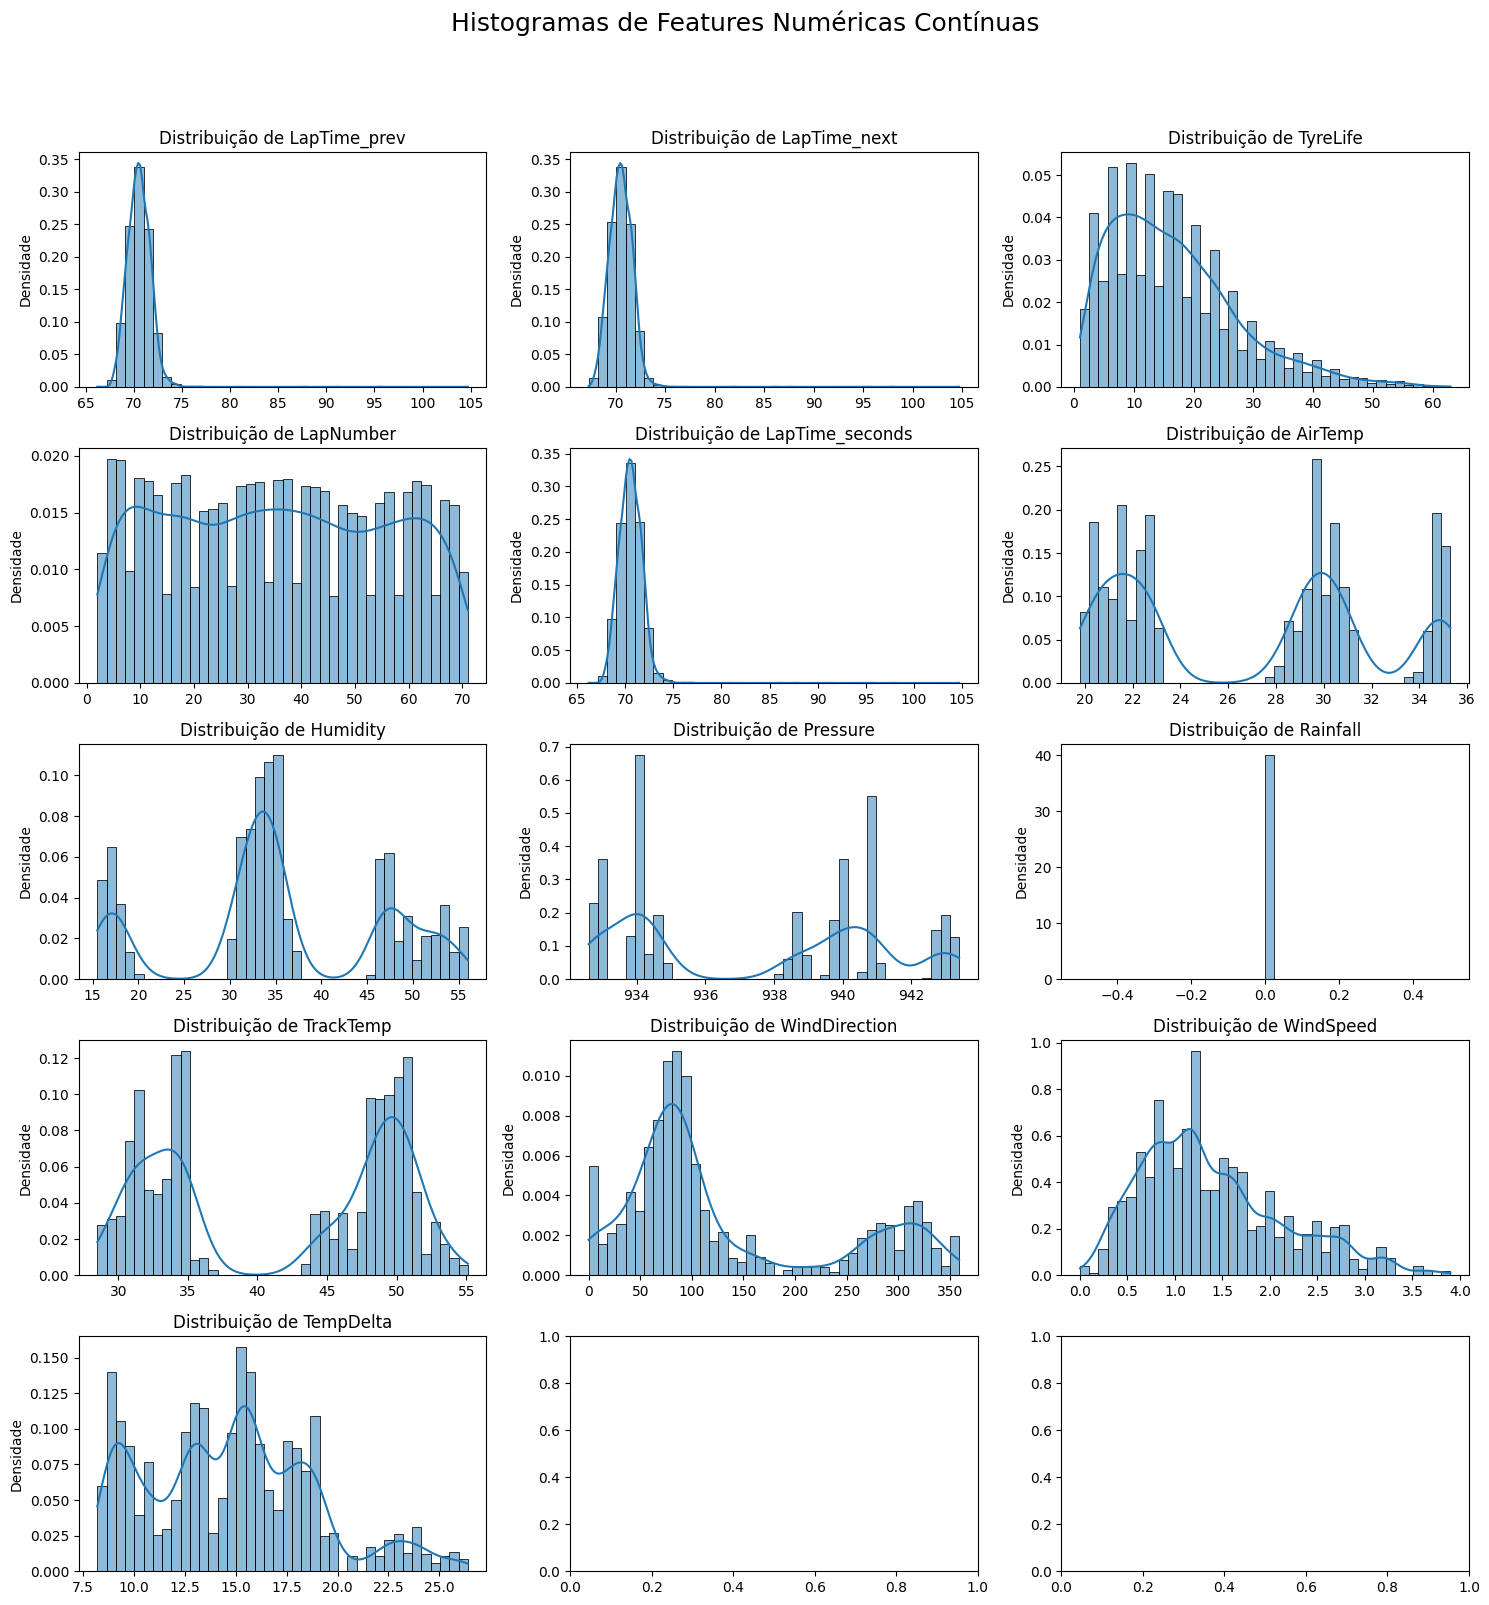

In [5]:
n_rows_cont = 5
n_cols_cont = 3
fig_cont, axes_cont = plt.subplots(n_rows_cont, n_cols_cont, figsize=(15, 16))
flat_axes_cont = axes_cont.flatten() 

continuous_cols = [
    'LapTime_prev', 'LapTime_next', 'TyreLife', 'LapNumber', 'LapTime_seconds',
    'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'TempDelta'
]

num_df = laps_with_weather[continuous_cols].copy()

for i, col in enumerate(continuous_cols):
    ax = flat_axes_cont[i]
    
    data_to_plot = num_df[col].dropna()
    
    if data_to_plot.empty:
        ax.set_title(f'{col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:
        sns.histplot(data_to_plot, kde=True, ax=ax, bins=40, stat="density") 
        ax.set_title(f'Distribuição de {col}')
        ax.set_xlabel('')
        ax.set_ylabel('Densidade') 

plt.suptitle('Histogramas de Features Numéricas Contínuas', fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

TyreLife pode ser melhor visualizada através de histogramas separados, que seperam por compostos de pneu.

* C1: Pneu Duro
* C2: Pneu Médio
* C3: Pneu Macio

Nenhum dado disponível para o composto C1. Pulando.


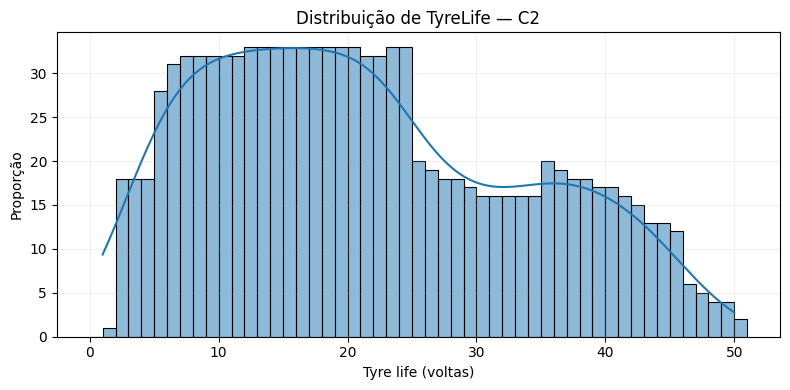

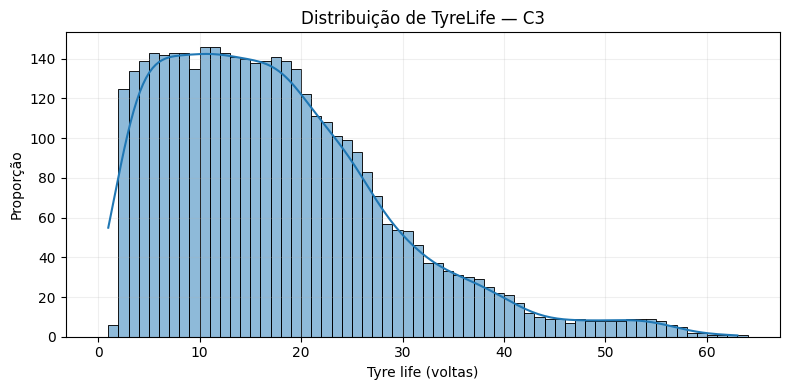

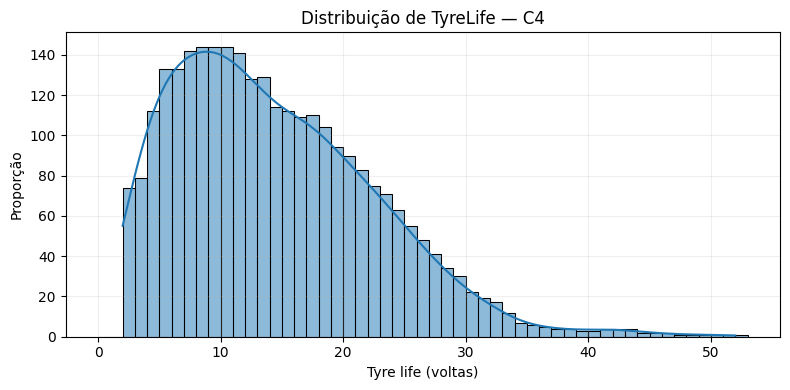

In [6]:
compounds_to_plot = ['C1', 'C2', 'C3', 'C4']

for comp in compounds_to_plot:
    if 'pirelliCompound' in laps_with_weather.columns:
        subset = laps_with_weather[laps_with_weather['pirelliCompound'] == comp]
    elif 'Compound' in laps_with_weather.columns:
        subset = laps_with_weather[laps_with_weather['Compound'] == comp]
    else:
        subset = laps_with_weather[laps_with_weather.get('compound') == comp] if 'compound' in laps_with_weather.columns else laps_with_weather[[]]

    if subset.empty:
        print(f'Nenhum dado disponível para o composto {comp}. Pulando.')
        continue

    tyre_life = subset['TyreLife'].dropna()
    if tyre_life.empty:
        print(f'Nenhum TyreLife válido para {comp}. Pulando.')
        continue

    max_life = int(tyre_life.max()) if pd.api.types.is_numeric_dtype(tyre_life) else tyre_life.max()
    bins = range(0, max(2, max_life + 2)) if isinstance(max_life, int) else 10

    plt.figure(figsize=(8,4))
    sns.histplot(tyre_life, bins=bins, kde=True, color='C0', stat='count')
    plt.title(f'Distribuição de TyreLife — {comp}')
    plt.xlabel('Tyre life (voltas)')
    plt.ylabel('Proporção')
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


São features multimodais: AirTemp, Humidity, WindDirection, WindSpeed, Pressure.

## CDF das Variáveis Númericas

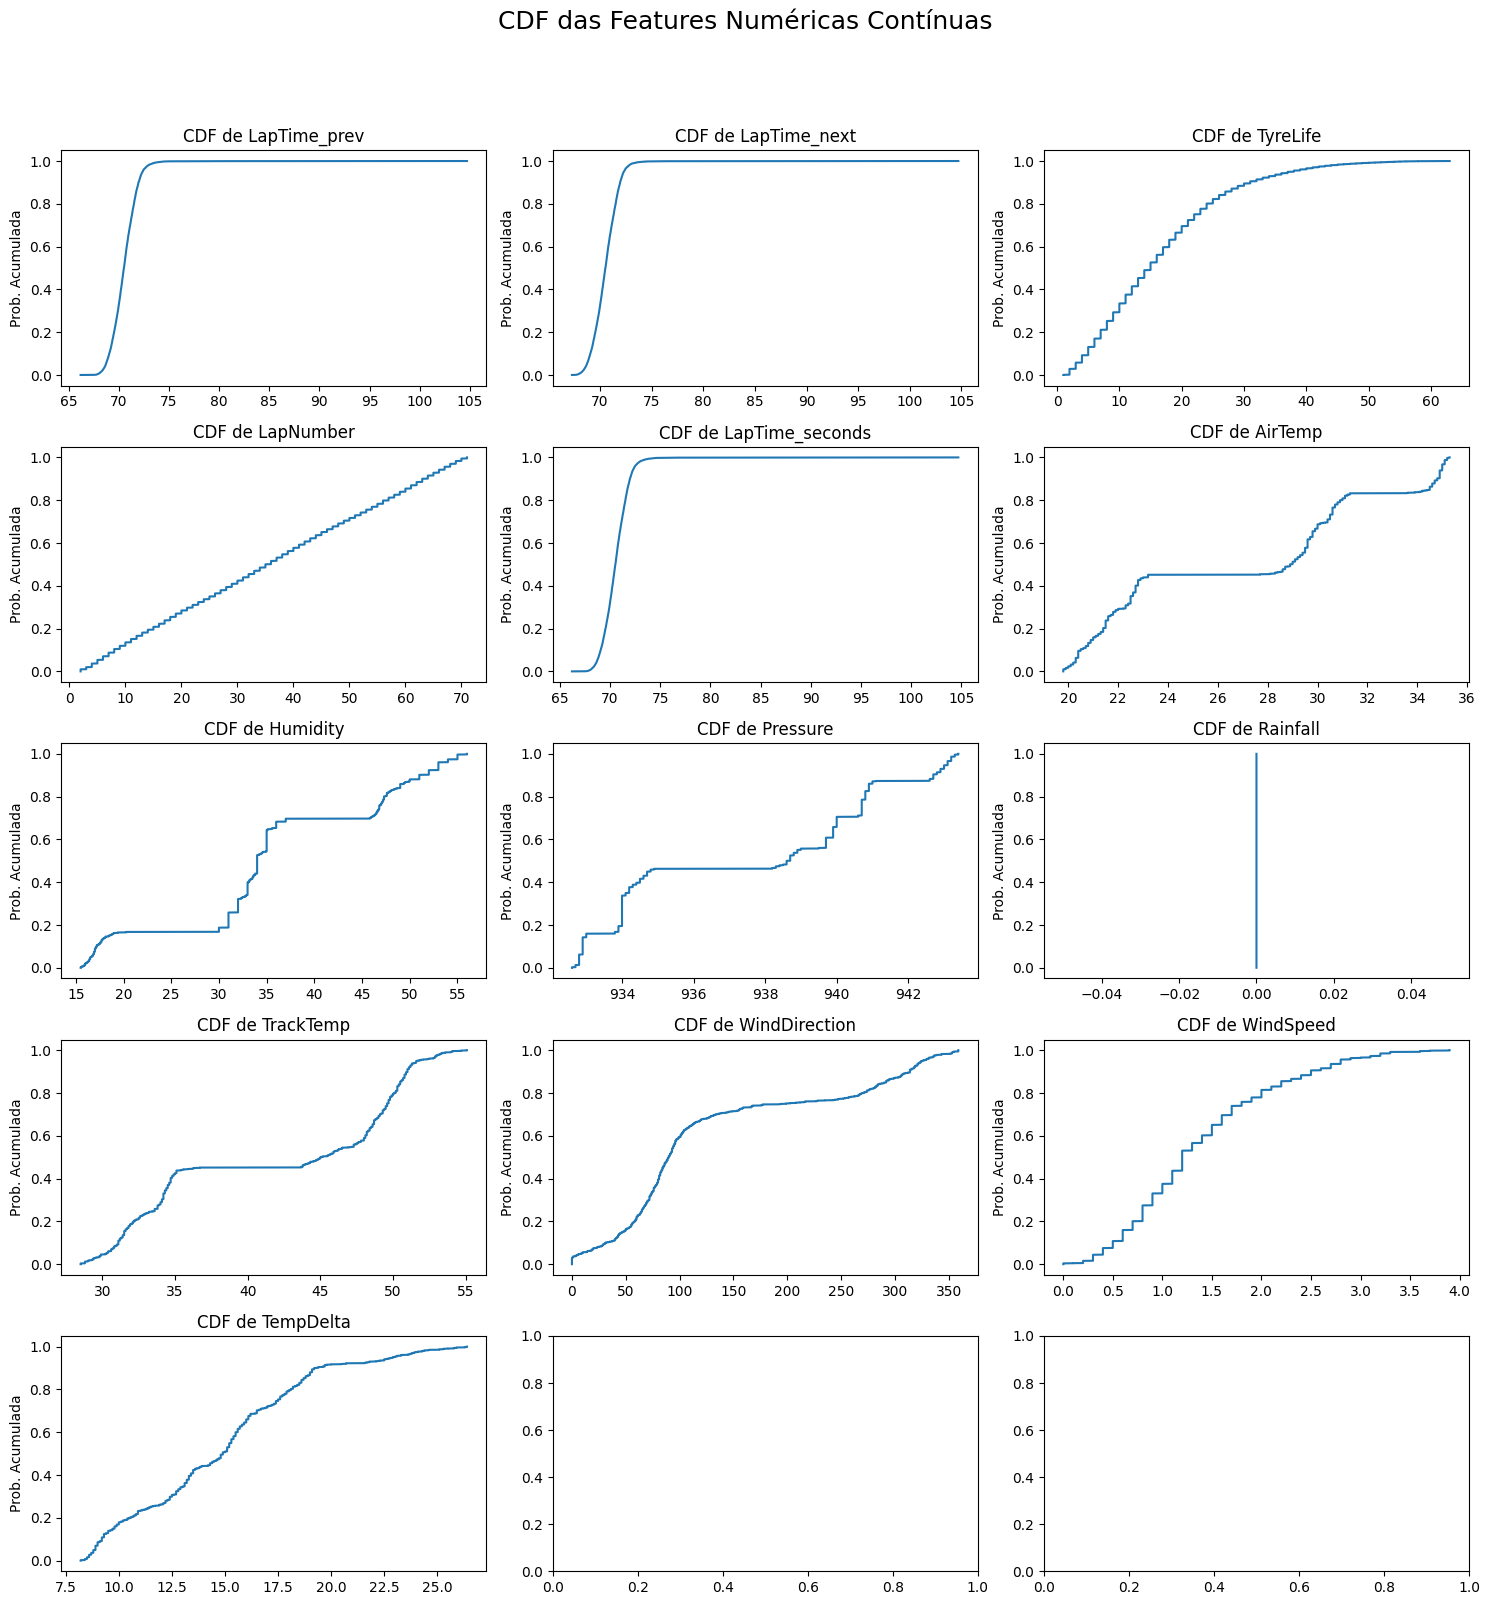

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig_cdf, axes_cdf = plt.subplots(n_rows_cont, n_cols_cont, figsize=(15, 16))
flat_axes_cdf = axes_cdf.flatten()


for i, col in enumerate(continuous_cols):
    ax = flat_axes_cdf[i]

    data_to_plot = num_df[col].dropna()

    if data_to_plot.empty:
        ax.set_title(f'{col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:

        sorted_vals = np.sort(data_to_plot)
        cdf_vals = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)

        ax.plot(sorted_vals, cdf_vals)
        ax.set_title(f'CDF de {col}')
        ax.set_xlabel('')
        ax.set_ylabel('Prob. Acumulada')

plt.suptitle('CDF das Features Numéricas Contínuas', fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])


## Frequência das Features Categóricas



Gerando gráficos de frequência (Countplots) para variáveis categóricas...


C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\324819760.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_to_plot, ax=ax, order=bar_order, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\324819760.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\324819760.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_to_plot, ax=ax, order=bar_order, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\324819760.py:36: UserWarning: set_ticklab

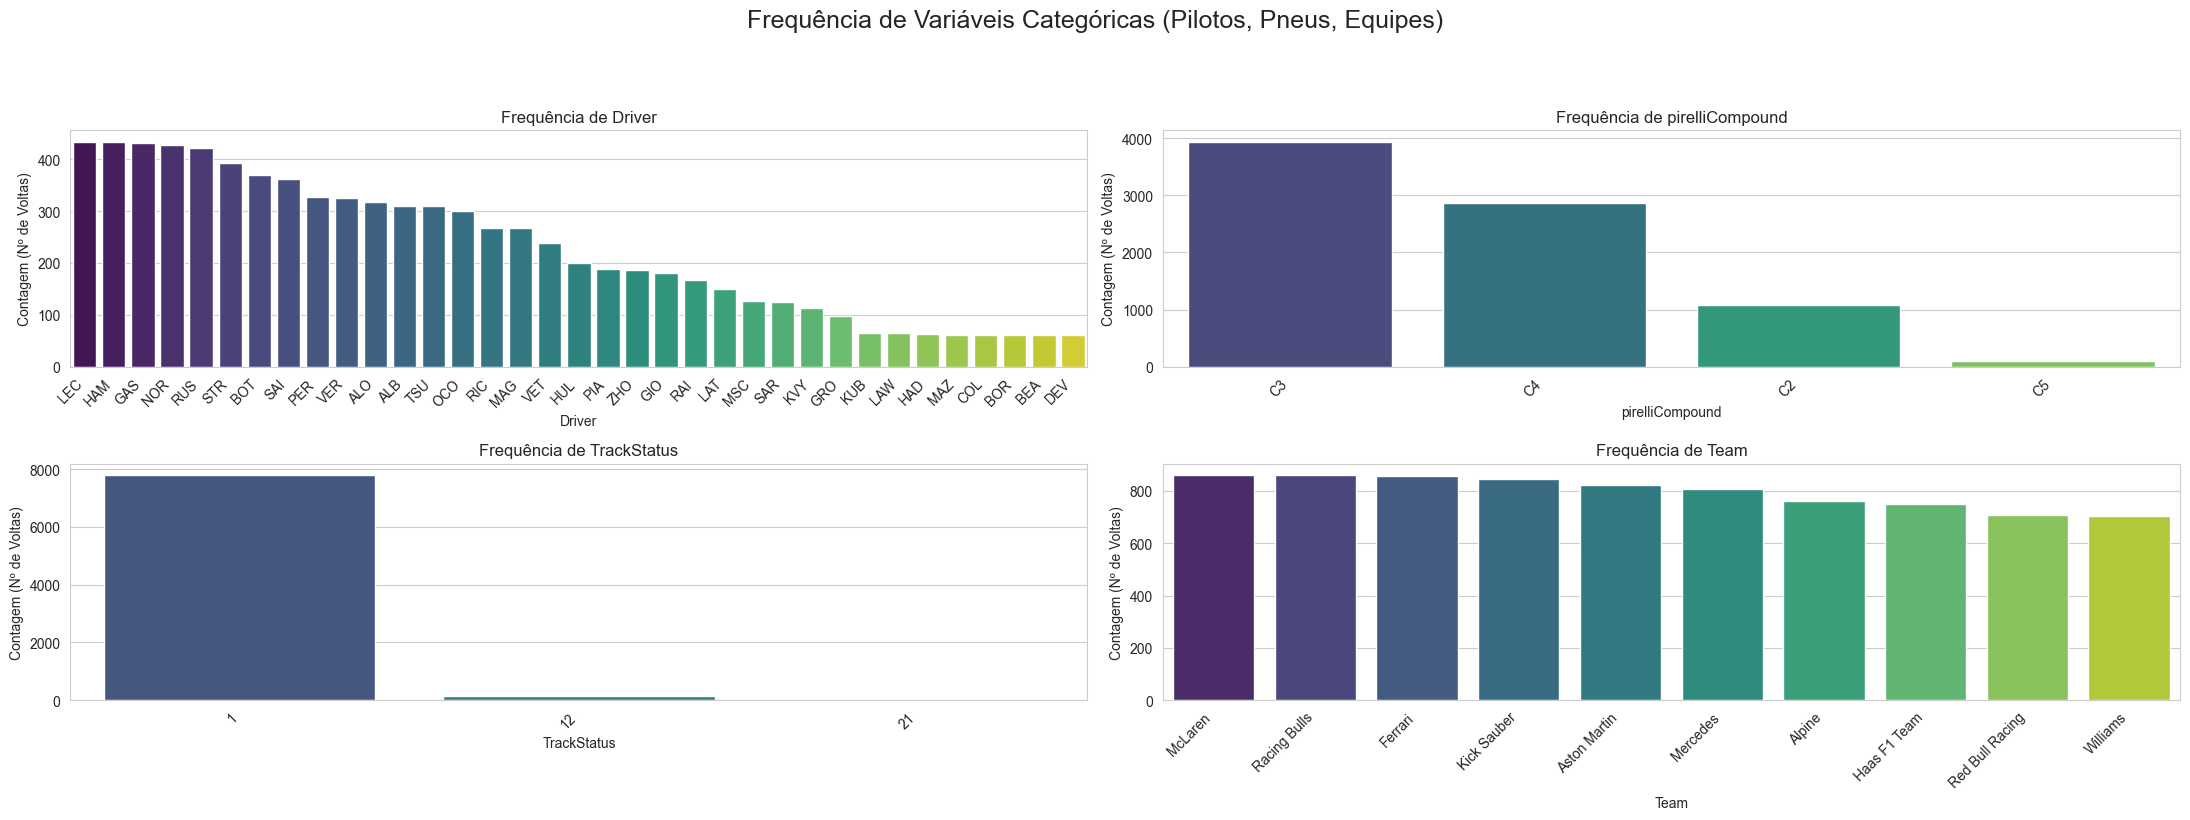

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cat_cols = ['Driver', 'pirelliCompound','TrackStatus', 'Team']

print("Gerando gráficos de frequência (Countplots) para variáveis categóricas...")

sns.set_style("whitegrid")

n_rows_cat = 2
n_cols_cat = 2
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(22, 8)) 

flat_axes_cat = axes_cat.flatten()

for i, col in enumerate(cat_cols):
    ax = flat_axes_cat[i]
    
    data_to_plot = laps_with_weather[col].dropna()
    
    if data_to_plot.empty:
        ax.set_title(f'Frequência de {col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:
        bar_order = data_to_plot.value_counts().index
        
        sns.countplot(x=data_to_plot, ax=ax, order=bar_order, palette="viridis")
        
        ax.set_title(f'Frequência de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Contagem (Nº de Voltas)')
        
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Frequência de Variáveis Categóricas (Pilotos, Pneus, Equipes)', fontsize=18, y=1.05)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

plt.show()

A variável TrackStatus é um combinação de flags númericas que indica o que aconteceu durante aquela volta:

* 1: Pista Livre;
* 2: Bandeira Amarela;
* 3 ??? (Erro);
* 4: Safety Car
* 5: Banderia Vermelha;
* 6: Começo de Virtual Safety Car;
* 7: Final de Virtual Safety Car;

A string '12' por exemplo, indica bandeira verde e amarela durante a mesma volta. '124' indica bandeira verde, bandeira amarela e depois safety car na mesma volta.
Com essa informação, vou deixar só a incidencia das seis primeiras. Isso para o GP do Bahrein. Para outra análise, pode ser necessária outra abordagem.

Dessa maneira, tratarei TrackStatus da seguinte maneira:

* OnlyGreenFlag: Variável criada para saber se a volta foi dada apenas em bandeira verde.
* IsSC: Variável criada para saber se houve VSC ou SC naquela volta, ou se houve bandeira vermelha.

In [9]:
laps_with_weather['OnlyGreenFlag'] = (laps_with_weather['TrackStatus'] == '1')
sc_vsc_codes = ['4','5', '6', '7']
laps_with_weather['isSC'] = laps_with_weather['TrackStatus'].isin(sc_vsc_codes)

laps_with_weather = laps_with_weather[laps_with_weather['OnlyGreenFlag'] == True].copy()


## Box Plots das Features Númericas

C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\4065745106.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_to_plot, ax=ax, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\4065745106.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_to_plot, ax=ax, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\4065745106.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_to_plot, ax=ax, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_2988\4065745106.py:18: FutureWarning: 

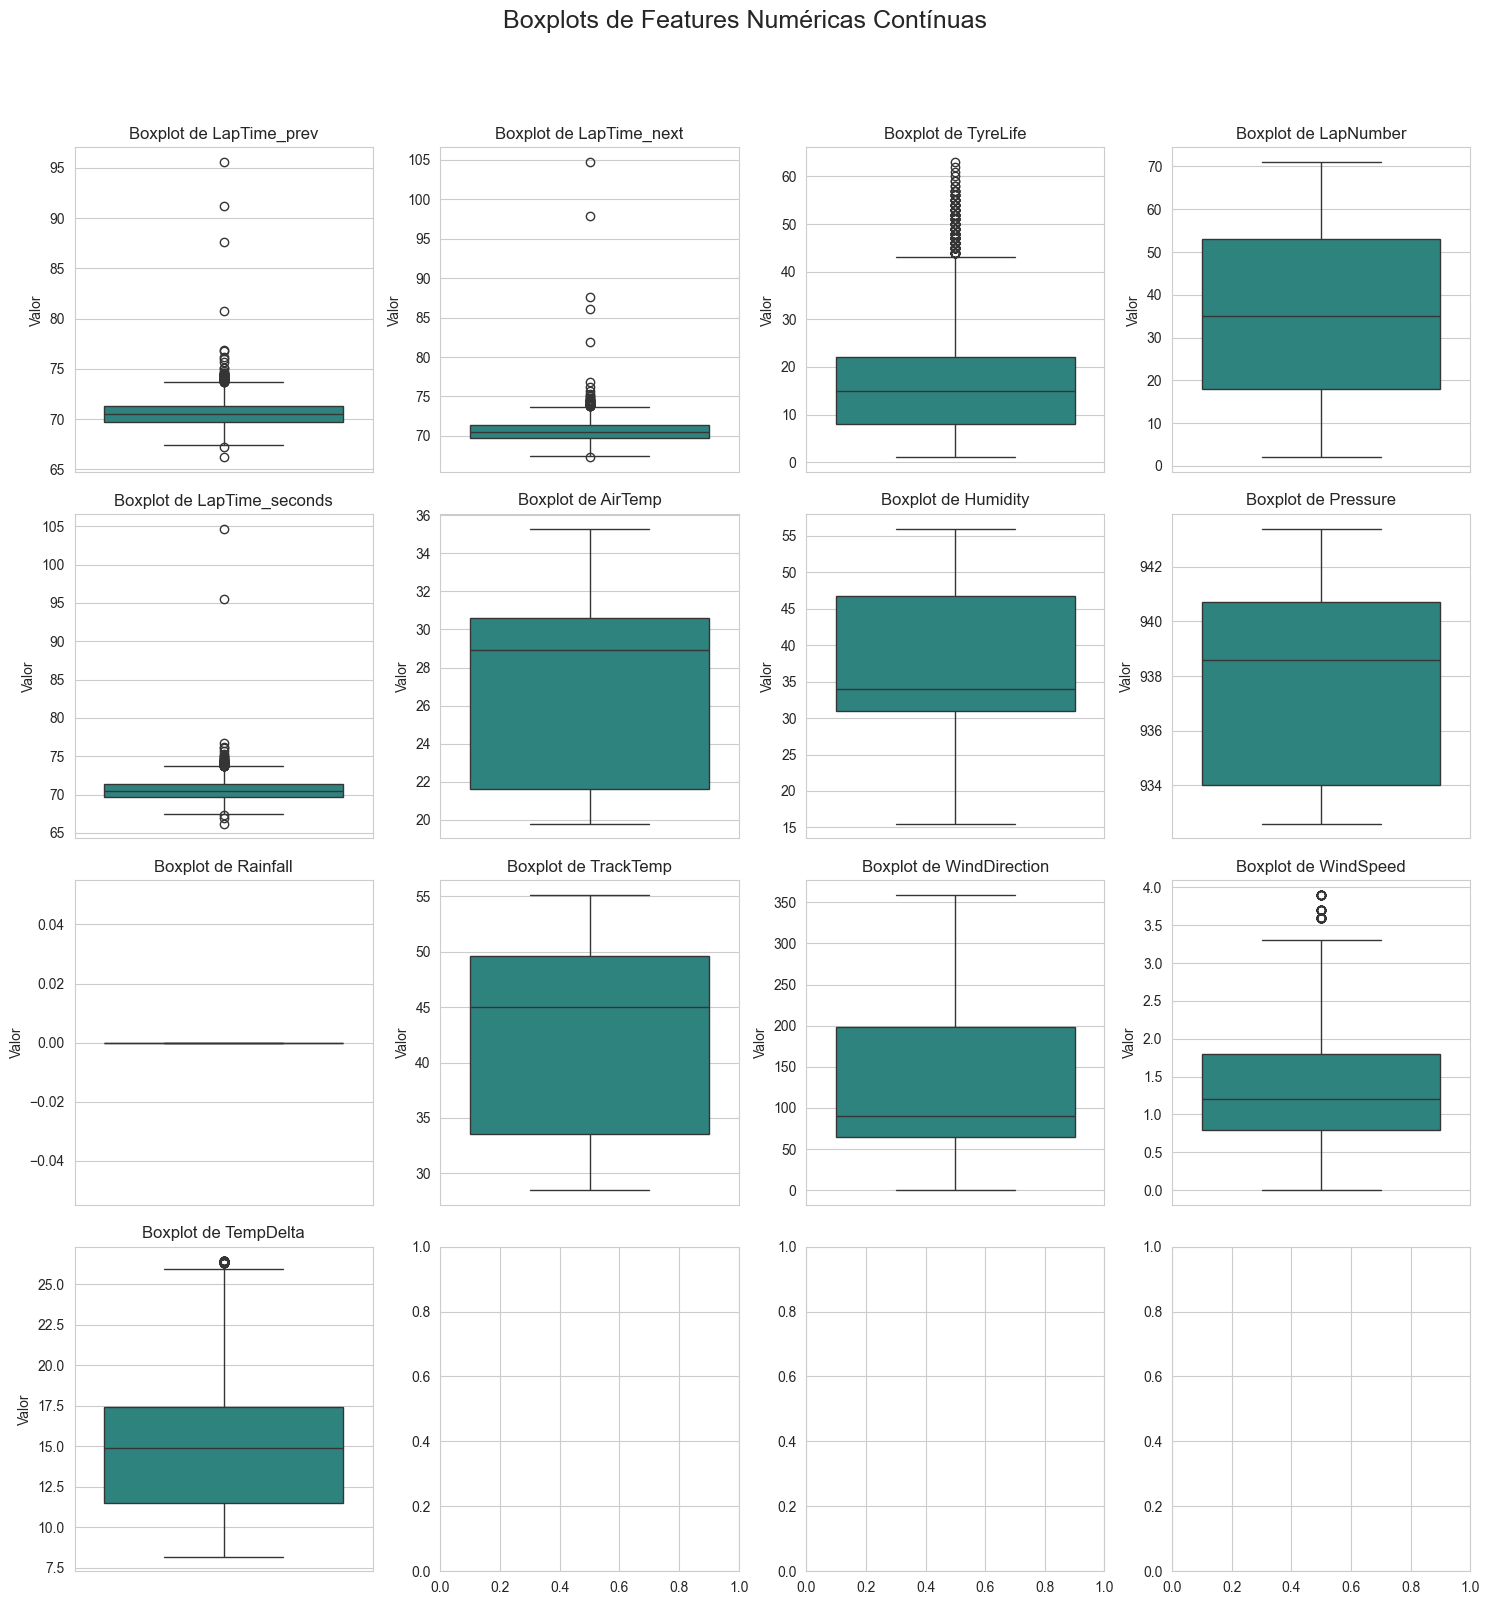

In [10]:
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 16))
flat_axes = axes.flatten()

sns.set_style("whitegrid")

for i, col in enumerate(continuous_cols):
    ax = flat_axes[i]
    
    data_to_plot = laps_with_weather[col].dropna()
    
    if data_to_plot.empty:
        ax.set_title(f'Boxplot de {col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:
        sns.boxplot(y=data_to_plot, ax=ax, palette="viridis") 
        ax.set_title(f'Boxplot de {col}')
        ax.set_xlabel('') 
        ax.set_ylabel('Valor')
            
plt.suptitle('Boxplots de Features Numéricas Contínuas', fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

## Construindo tabela de descrição das variavéis



In [11]:
try:
    stats_df = laps_with_weather.describe(include='all')

    features_interesse = [
    'LapTime_prev', 'LapTime_next', 'Stint', 'TyreLife', 'LapNumber', 'LapTime_seconds', 'Year',
    'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'TrackStatus'
    ]

    skewness = laps_with_weather.skew(numeric_only=True)
    
    kurtosis = laps_with_weather.kurt(numeric_only=True)
    
    # Coeficiente de Variação (CV = std / mean)
    means = laps_with_weather.mean(numeric_only=True)
    stds = laps_with_weather.std(numeric_only=True)
    
    cv = np.where(means == 0, np.nan, stds / means)
    
    cv_series = pd.Series(cv, index=means.index)

    stats_df = stats_df[features_interesse]

    stats_df.loc['skewness'] = skewness
    stats_df.loc['kurtosis'] = kurtosis
    stats_df.loc['CV (Coef. Var)'] = cv_series


    print("\n--- Estatísticas ---")
    display(stats_df)
    

except Exception as e:
    print(f"Ocorreu um erro ao calcular as estatísticas: {e}")
    print("Verifique se o DataFrame 'laps_with_weather' existe e não está vazio.")


--- Estatísticas ---


,LapTime_prev,LapTime_next,Stint,TyreLife,LapNumber,LapTime_seconds,Year,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,TrackStatus
count,7464.000000,7490.000000,7798.000000,7798.000000,7798.000000,7798.000000,7798.000000,7781.000000,7781.000000,7781.000000,7781,7781.000000,7781.000000,7781.000000,7798
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7781,NaN,NaN,NaN,7798
mean,70.547293,70.538933,2.219672,16.509618,35.541677,70.548114,2022.005386,26.954530,35.640547,937.453052,NaN,41.658990,131.778435,1.377381,NaN
min,66.200000,67.275000,1.000000,1.000000,2.000000,66.200000,2019.000000,19.800000,15.500000,932.600000,NaN,28.500000,0.000000,0.000000,NaN
25%,69.739750,69.738250,1.000000,8.000000,18.000000,69.743250,2020.000000,21.600000,31.000000,934.000000,NaN,33.600000,65.000000,0.800000,NaN
50%,70.518000,70.518000,2.000000,15.000000,35.000000,70.526000,2022.000000,28.900000,34.000000,938.600000,NaN,45.000000,90.000000,1.200000,NaN
75%,71.322250,71.320000,3.000000,22.000000,53.000000,71.332000,2024.000000,30.600000,46.800000,940.700000,NaN,49.600000,199.000000,1.800000,NaN
max,95.554000,104.706000,5.000000,63.000000,71.000000,104.706000,2025.000000,35.300000,56.000000,943.400000,NaN,55.100000,359.000000,3.900000,NaN


## Limiares da tabela

In [12]:
# Quais features da tabela têm:
# - skewness > 1
# - skewness < -1
# stats_df já foi calculado anteriormente
skewed_features = {
    'right_skewed': [],
    'left_skewed': []
}

for feature in stats_df.columns:
    skewness_value = stats_df.at['skewness', feature]
    if pd.notna(skewness_value):
        if skewness_value > 1:
            skewed_features['right_skewed'].append(feature)
        elif skewness_value < -1:
            skewed_features['left_skewed'].append(feature)

print("\n--- Features com Skewness Significativo ---")
print("Right Skewed (skewness > 1):", skewed_features['right_skewed'])
print("Left Skewed (skewness < -1):", skewed_features['left_skewed'])



--- Features com Skewness Significativo ---
Right Skewed (skewness > 1): ['LapTime_prev', 'LapTime_next', 'TyreLife', 'LapTime_seconds']
Left Skewed (skewness < -1): []


## Trocas de pneus

Através de uma matriz de transições, analisamos as trocas entre os stints

Analisando transições de compostos entre stints...

--- Matriz de Contagem de Transição de Stints ---


To_Compound,C2,C3,C4,C5
From_Compound,,,,
C2,4,3,7,0
C3,21,29,36,2
C4,12,75,15,3
C5,0,6,2,0



Gerando heatmap da matriz de transição...


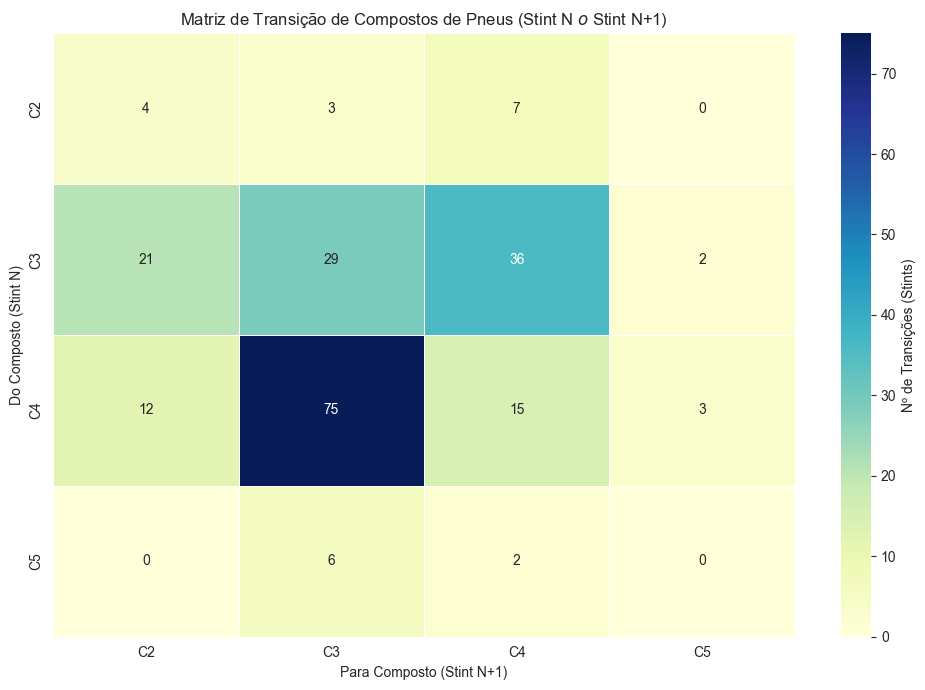

In [13]:
print("Analisando transições de compostos entre stints...")

try:

    stint_df = laps_with_weather[
        ['Year', 'Driver', 'Stint', 'pirelliCompound']
    ].drop_duplicates()
    
    stint_df = stint_df.sort_values(by=['Year', 'Driver', 'Stint'])

    stint_df['To_Compound'] = stint_df.groupby(['Year', 'Driver'])['pirelliCompound'].shift(-1)
    
    stint_df = stint_df.rename(columns={'pirelliCompound': 'From_Compound'})
    
    transitions_df = stint_df.dropna(subset=['To_Compound'])

    if transitions_df.empty:
        print("Não foi possível encontrar dados de transição (múltiplos stints) no DataFrame.")
    else:
        transition_matrix = pd.crosstab(
            transitions_df['From_Compound'], 
            transitions_df['To_Compound']
        )

        print("\n--- Matriz de Contagem de Transição de Stints ---")
        display(transition_matrix)

        print("\nGerando heatmap da matriz de transição...")
        plt.figure(figsize=(10, 7))
        
        ax = sns.heatmap(
            transition_matrix, 
            annot=True, 
            fmt="d",  
            cmap="YlGnBu", 
            linewidths=.5,
            cbar_kws={'label': 'Nº de Transições (Stints)'}
        )
        
        ax.set_title('Matriz de Transição de Compostos de Pneus (Stint N $\to$ Stint N+1)')
        ax.set_xlabel('Para Composto (Stint N+1)')
        ax.set_ylabel('Do Composto (Stint N)')
        plt.tight_layout()
        plt.show()

except NameError:
    print("Erro: O DataFrame 'laps_with_weather_filtered' não foi encontrado.")
    print("Por favor, execute a célula anterior que define este DataFrame.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

A maioria dos trabalhos da bibliografia escolhe não trabalhar com corridas chuvosas, focando em em corridas ideais.

Em termos da temperatura da pista, humidade e pressão, ocorre padronização dos dados ou normalização.

Uma derivação comum nas features de temperatura seria criar um delta de temperatura, combinando a diferença entre a temperatura de pista e do ar.
Também pode se criar um fator de degradação, que combina a vida do pneu e a temperatura de pista para entender o quanto ele se desgasta. Um pneu de 25 voltas a 50 graus é muito pior que um pneu de 20 voltas a 25 graus.

## Transformações das Features

### Transformação nas Features Multimodais

As features multimodais são basicamente as features climáticas.

Aplicando Transformação RBF (Gamma=0.1) usando a MEDIANA como referência...
Coluna 'TrackTemp': Mediana = 45.00
Coluna 'AirTemp': Mediana = 28.90
Coluna 'Humidity': Mediana = 34.00
Coluna 'Pressure': Mediana = 938.60
Coluna 'WindSpeed': Mediana = 1.20
Coluna 'WindDirection': Mediana = 90.00
Coluna 'TempDelta': Mediana = 14.90


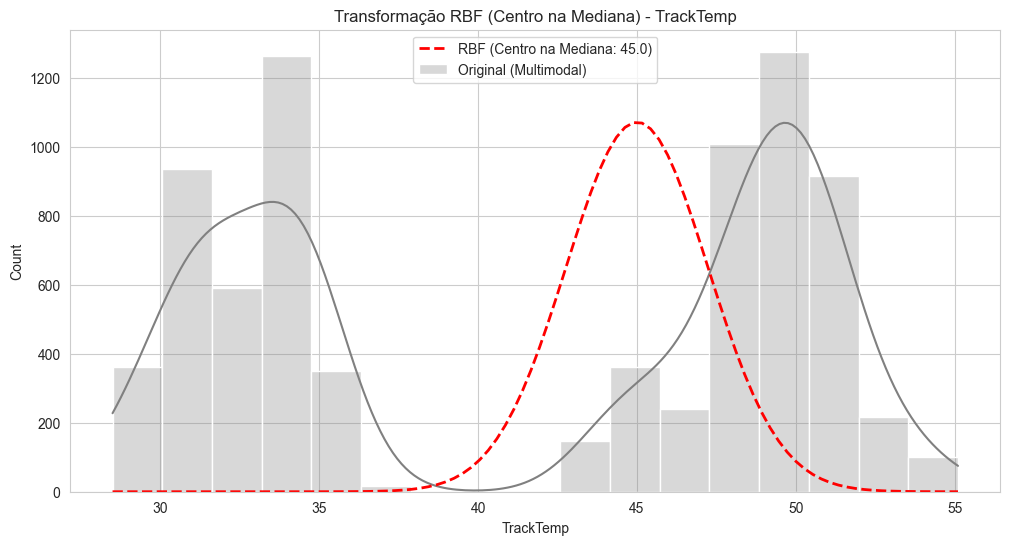


Novas Features Criadas: ['TrackTemp_RBF_Median', 'AirTemp_RBF_Median', 'Humidity_RBF_Median', 'Pressure_RBF_Median', 'WindSpeed_RBF_Median', 'WindDirection_RBF_Median', 'TempDelta_RBF_Median']


In [14]:
weather_cols = ['TrackTemp', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TempDelta']
gamma_value = 0.1

print(f"Aplicando Transformação RBF (Gamma={gamma_value}) usando a MEDIANA como referência...")

laps_with_weather = laps_with_weather.copy()

for col in weather_cols:
    if col in laps_with_weather.columns:
        median_val = laps_with_weather[col].median()
        
        print(f"Coluna '{col}': Mediana = {median_val:.2f}")
    
        col_name = f"{col}_RBF_Median"
        
        squared_dist = (laps_with_weather[col] - median_val) ** 2
        laps_with_weather[col_name] = np.exp(-gamma_value * squared_dist)
        
        laps_with_weather[col_name] = laps_with_weather[col_name].fillna(0)

col_exemplo = 'TrackTemp'
if col_exemplo in weather_cols:
    col_transformed = f"{col_exemplo}_RBF_Median"
    median_exemplo = laps_with_weather[col_exemplo].median()
    
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    
    sns.histplot(laps_with_weather[col_exemplo], kde=True, ax=ax1, color='gray', alpha=0.3, label='Original (Multimodal)')
    
    x_range = np.linspace(laps_with_weather[col_exemplo].min(), laps_with_weather[col_exemplo].max(), 100)
    y_rbf = np.exp(-gamma_value * (x_range - median_exemplo)**2)
    
    y_max_hist = ax1.get_ylim()[1]
    plt.plot(x_range, y_rbf * y_max_hist * 0.8, color='red', linewidth=2, linestyle='--', label=f'RBF (Centro na Mediana: {median_exemplo:.1f})')

    plt.title(f'Transformação RBF (Centro na Mediana) - {col_exemplo}')
    plt.legend()
    plt.show()

new_features = [c for c in laps_with_weather.columns if '_RBF_Median' in c]
print(f"\nNovas Features Criadas: {new_features}")

### Transformação das Features Right Skewed

As features referentes aos tempos de voltas apresentam assimetria à direita. A transformação logarítimica é a técnica padrão.

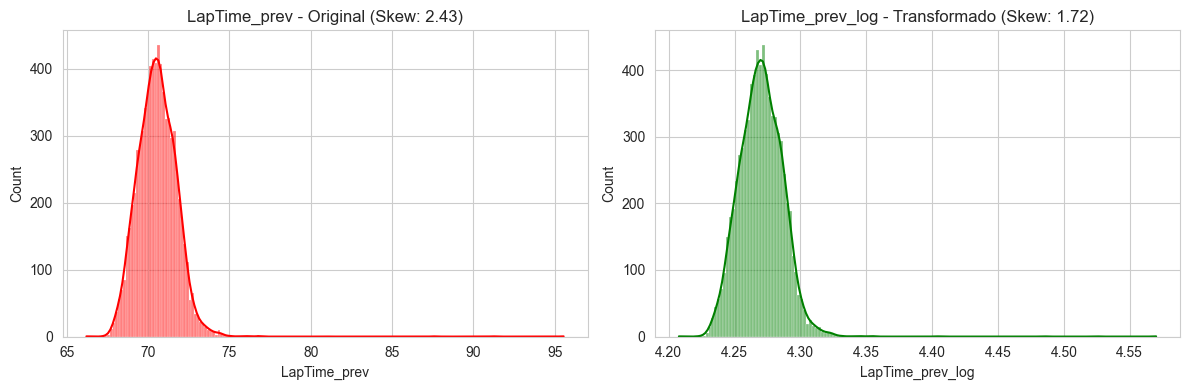

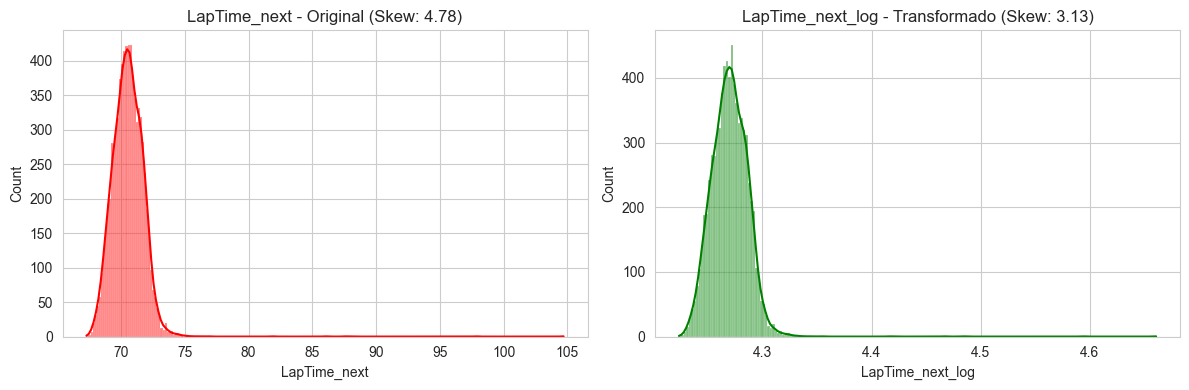

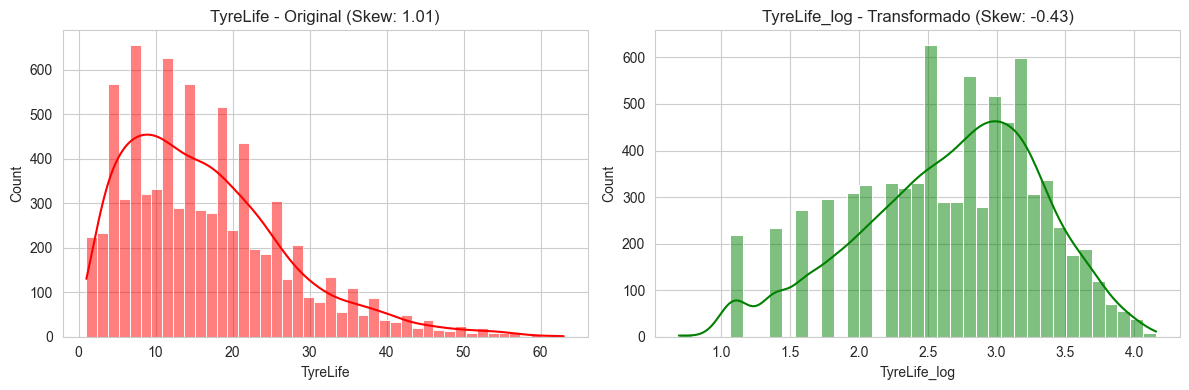

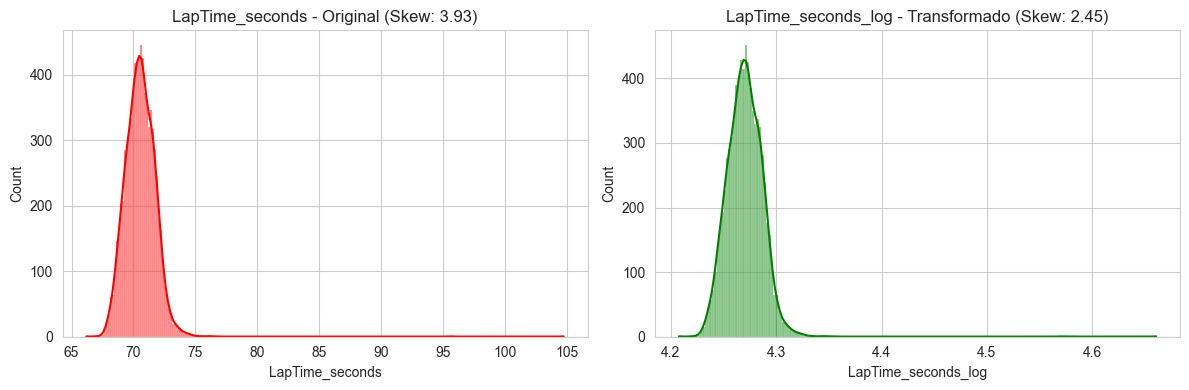

In [15]:
right_skewed_cols = skewed_features['right_skewed']

for col in right_skewed_cols:
    if col in laps_with_weather.columns:
        laps_with_weather[f'{col}_log'] = np.log1p(laps_with_weather[col])

for col in right_skewed_cols:
    if col in laps_with_weather.columns:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        
        # Original
        sns.histplot(laps_with_weather[col], kde=True, ax=ax[0], color='red')
        ax[0].set_title(f'{col} - Original (Skew: {laps_with_weather[col].skew():.2f})')
        
        # Transformado
        sns.histplot(laps_with_weather[f'{col}_log'], kde=True, ax=ax[1], color='green')
        ax[1].set_title(f'{col}_log - Transformado (Skew: {laps_with_weather[f"{col}_log"].skew():.2f})')
        
        plt.tight_layout()
        plt.show()

## Matriz de Correlação



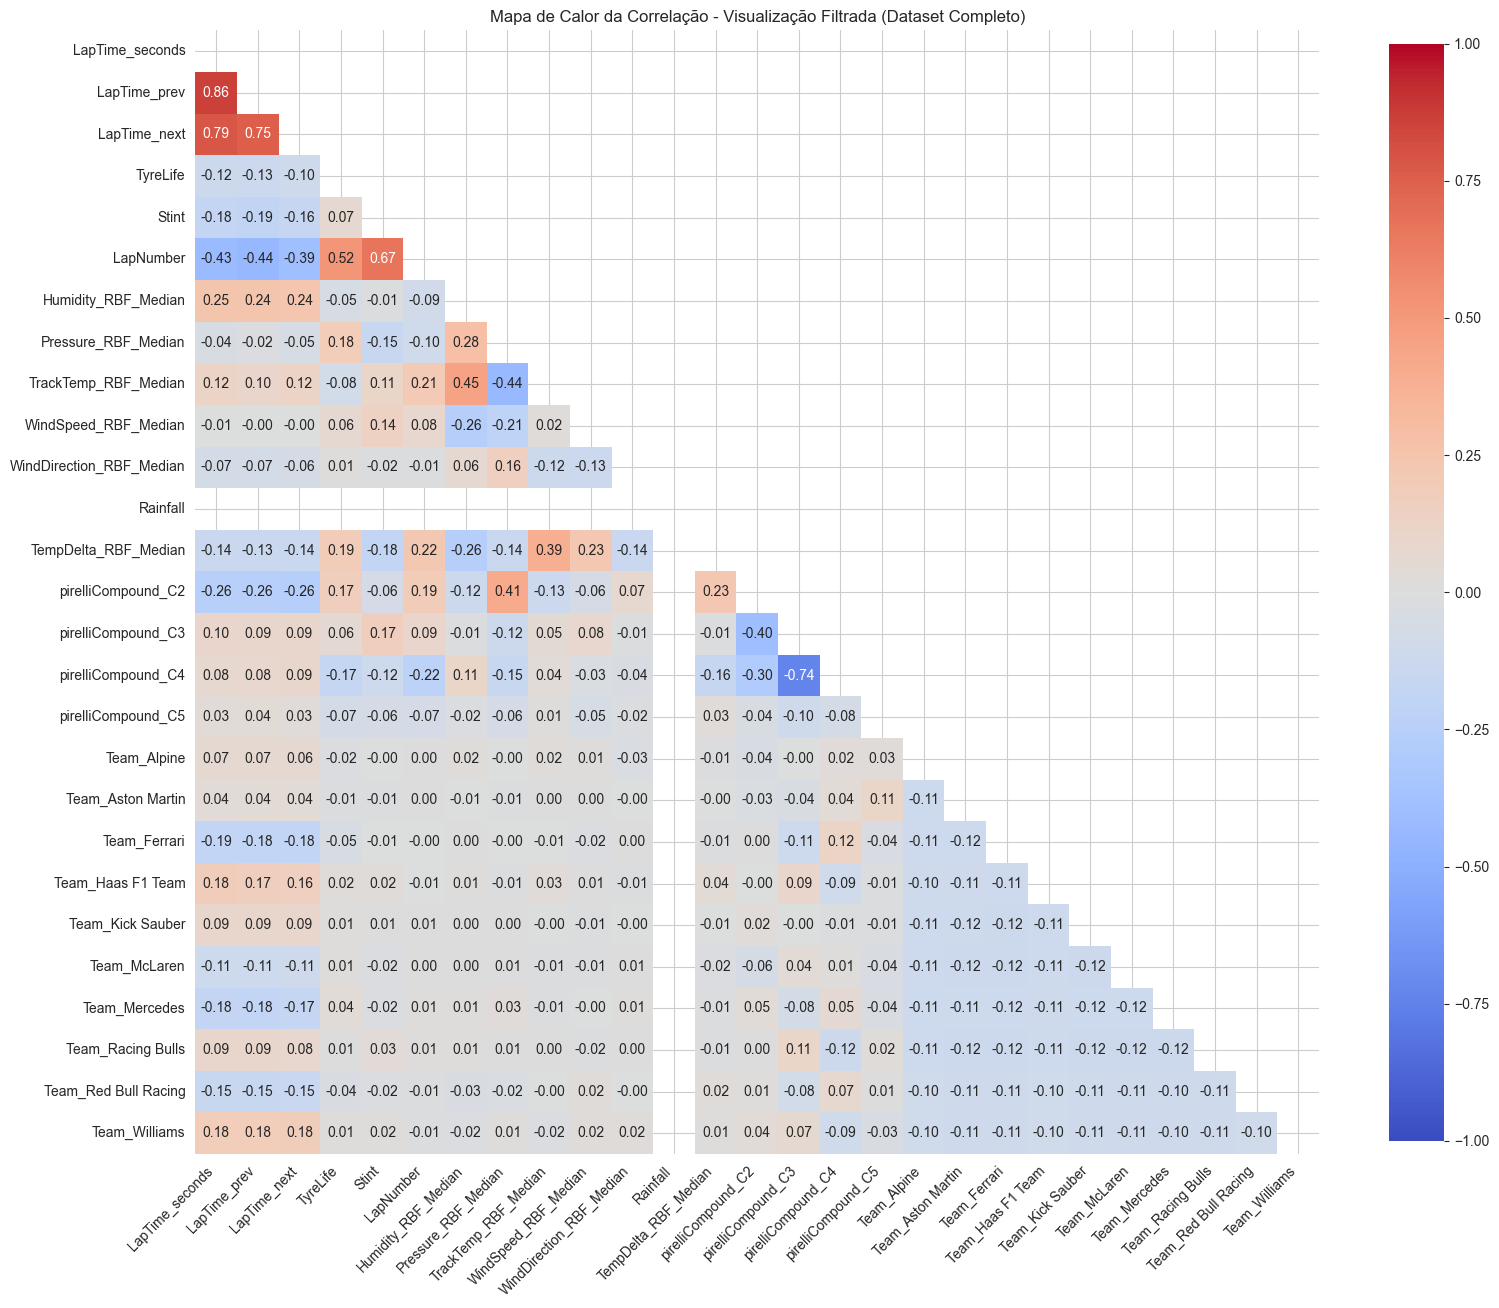

In [16]:
num_cols = ['LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'TyreLife', 'Stint', 'LapNumber',
        'Humidity_RBF_Median','Pressure_RBF_Median', 'TrackTemp_RBF_Median', 'WindSpeed_RBF_Median', 'WindDirection_RBF_Median', 'Rainfall', 
        'TempDelta_RBF_Median']

cat_cols = ['Driver', 'pirelliCompound', 'Team']
cat_dummies = pd.get_dummies(laps_with_weather[cat_cols], prefix=cat_cols)

num_df = laps_with_weather[num_cols].copy()
corr_df_full = pd.concat([num_df, cat_dummies], axis=1)

corr_df_clean = corr_df_full.dropna()

if corr_df_clean.empty or corr_df_clean.shape[1] <= 1:
    print("Nenhum dado completo disponível para gerar a matriz de correlação.")
else:
    corr_matrix = corr_df_clean.corr(method='pearson')
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    prefixes = [
    "Team_",
    "pirelliCompound_"
    ]

    cols_numeric = [
    'LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'TyreLife', 'Stint', 'LapNumber',
        'Humidity_RBF_Median','Pressure_RBF_Median', 'TrackTemp_RBF_Median', 'WindSpeed_RBF_Median', 'WindDirection_RBF_Median', 'Rainfall', 
        'TempDelta_RBF_Median'
    ]

    cols_categoric = [
    col for col in corr_matrix.columns
    if any(col.startswith(p) for p in prefixes)
    ] 

    cols_to_display = cols_numeric + cols_categoric
    cols_to_display = [c for c in cols_to_display if c in corr_matrix.columns]

    corr_subset = corr_matrix.loc[cols_to_display, cols_to_display]

    plt.figure(figsize=(max(10, len(cols_to_display)*0.6), max(6, len(cols_to_display)*0.6)))
    ax = sns.heatmap(
        corr_subset, annot=True, cmap='coolwarm', fmt='.2f',
        vmin=-1, vmax=1, cbar_kws={'shrink':0.7}, square=True, mask=np.triu(np.ones_like(corr_subset, dtype=bool))
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.title('Mapa de Calor da Correlação - Visualização Filtrada (Dataset Completo)')
    plt.tight_layout()
    plt.show()



## PCA

Iniciando preparação de dados para PCA e Clustering...
Dataset pronto para ML. Shape: (7798, 62)

--- Executando PCA ---
[6.21807193e-02 4.10148701e-02 3.82572023e-02 3.45711616e-02
 3.39000659e-02 3.36285626e-02 3.29980223e-02 3.21173149e-02
 3.18492929e-02 3.10566358e-02 2.93845256e-02 2.76519065e-02
 2.50915604e-02 2.36953150e-02 2.08353454e-02 1.89023118e-02
 1.82384188e-02 1.77136952e-02 1.72896692e-02 1.72162938e-02
 1.71703215e-02 1.71406016e-02 1.70848279e-02 1.70527845e-02
 1.69751870e-02 1.69180131e-02 1.68639776e-02 1.68250458e-02
 1.67716680e-02 1.67104750e-02 1.66863734e-02 1.66601325e-02
 1.66015024e-02 1.65783190e-02 1.65622355e-02 1.64107133e-02
 1.53734866e-02 1.51696346e-02 1.43032357e-02 1.35489212e-02
 1.32482862e-02 1.17352131e-02 1.14315351e-02 8.77373993e-03
 6.28847392e-03 5.31236084e-03 4.69022356e-03 4.52754534e-03
 3.84929524e-03 3.33162815e-03 2.62034824e-03 2.04073728e-03
 1.80798591e-03 1.31972050e-03 1.22868750e-03 1.19325636e-03
 8.81725797e-04 7.1889112

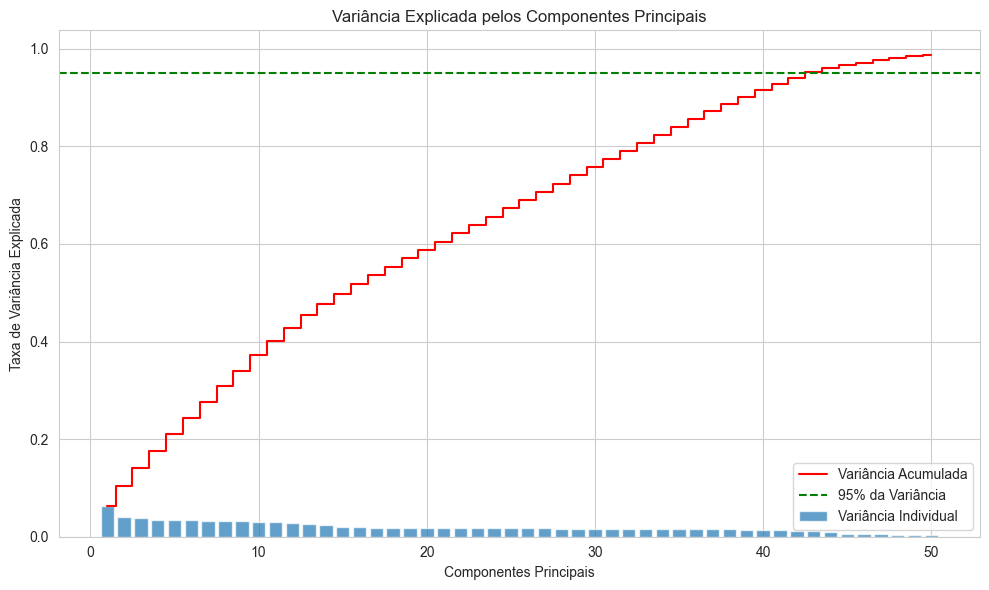

Usando 43 componentes do PCA para o K-Means.

--- Executando Análise de Silhueta para encontrar K ótimo ---
Para K = 2, Score de Silhueta = 0.0491
Para K = 3, Score de Silhueta = 0.0307
Para K = 4, Score de Silhueta = 0.0486
Para K = 5, Score de Silhueta = 0.0582
Para K = 6, Score de Silhueta = 0.0634
Para K = 7, Score de Silhueta = 0.1001
Para K = 8, Score de Silhueta = 0.1163
Para K = 9, Score de Silhueta = 0.1314
Para K = 10, Score de Silhueta = 0.1533
Para K = 11, Score de Silhueta = 0.1526
Para K = 12, Score de Silhueta = 0.1740
Para K = 13, Score de Silhueta = 0.1795
Para K = 14, Score de Silhueta = 0.1994
Para K = 15, Score de Silhueta = 0.1979
Para K = 16, Score de Silhueta = 0.2157
Para K = 17, Score de Silhueta = 0.2232
Para K = 18, Score de Silhueta = 0.2452
Para K = 19, Score de Silhueta = 0.2484
Para K = 20, Score de Silhueta = 0.2722
Para K = 21, Score de Silhueta = 0.2780
Para K = 22, Score de Silhueta = 0.2878
Para K = 23, Score de Silhueta = 0.3065
Para K = 24, Score d

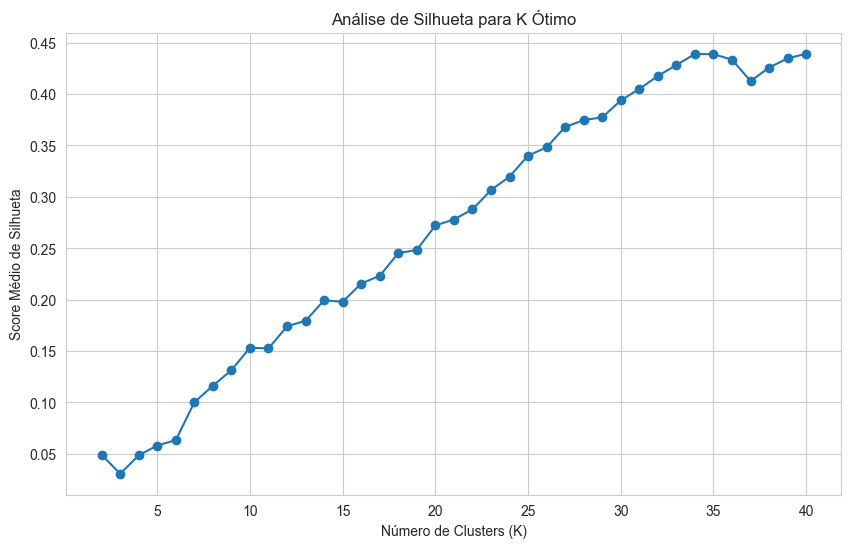

K ótimo encontrado (maior score): 40

--- Executando K-Means final com 40 traços ---

--- Centróides dos Traços (Perfil Médio de cada Cluster) ---


,LapTime_seconds,LapTime_prev,LapTime_next,TyreLife,Stint,LapNumber,Humidity_RBF_Median,Pressure_RBF_Median,TrackTemp_RBF_Median,WindSpeed_RBF_Median,WindDirection_RBF_Median,Rainfall,TempDelta_RBF_Median
Cluster,,,,,,,,,,,,,
0,69.42,69.64,69.45,14.58,1.92,29.88,0.94,1.00,0.03,0.83,0.26,0.0,0.01
1,69.14,69.18,69.18,21.05,1.70,35.82,0.24,0.55,0.03,0.94,0.09,0.0,0.61
2,69.97,69.98,69.99,17.22,2.15,35.67,0.40,0.39,0.15,0.94,0.06,0.0,0.45
3,70.08,70.11,70.08,16.13,2.00,34.88,0.39,0.42,0.14,0.95,0.06,0.0,0.48
4,71.27,71.23,71.22,19.10,2.71,34.72,0.46,0.44,0.19,0.96,0.04,0.0,0.46
5,70.80,70.79,70.77,15.87,2.21,36.08,0.43,0.27,0.18,0.95,0.04,0.0,0.42
6,70.62,70.62,70.61,17.47,2.17,35.57,0.41,0.38,0.16,0.94,0.05,0.0,0.47
7,69.82,69.85,69.83,15.59,2.35,36.23,0.41,0.40,0.15,0.94,0.06,0.0,0.46
8,70.57,70.57,70.56,17.30,2.37,37.38,0.43,0.41,0.16,0.94,0.06,0.0,0.46


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics 
import time

try:
    print("Iniciando preparação de dados para PCA e Clustering...")
    
    ml_df_full = pd.concat([num_df, cat_dummies], axis=1)

    imputer_num = SimpleImputer(strategy='mean')
    ml_df_imputed_num = imputer_num.fit_transform(ml_df_full[num_cols])
    num_df_imputed = pd.DataFrame(ml_df_imputed_num, columns=num_cols, index=ml_df_full.index)
    ml_df_imputed_analysis = pd.concat([num_df_imputed, cat_dummies], axis=1)
    
    scaler = StandardScaler()
    ml_df_scaled = scaler.fit_transform(ml_df_imputed_analysis)
    
    print(f"Dataset pronto para ML. Shape: {ml_df_scaled.shape}")

    print("\n--- Executando PCA ---")
    pca = PCA()
    pca.fit(ml_df_scaled)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    print(explained_variance_ratio)
    cumulative_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(10, 6))
    num_components_to_plot = min(50, len(cumulative_variance))
    plt.bar(range(1, num_components_to_plot + 1), explained_variance_ratio[:num_components_to_plot], alpha=0.7, align='center', label='Variância Individual')
    plt.step(range(1, num_components_to_plot + 1), cumulative_variance[:num_components_to_plot], where='mid', label='Variância Acumulada', color='red')
    plt.axhline(y=0.95, color='g', linestyle='--', label='95% da Variância')
    plt.ylabel('Taxa de Variância Explicada'); plt.xlabel('Componentes Principais')
    plt.title('Variância Explicada pelos Componentes Principais'); plt.legend(loc='best')
    plt.grid(True); plt.tight_layout()
    plt.show()

    n_components_95_idx = np.where(cumulative_variance >= 0.95)[0]
    if n_components_95_idx.size > 0:
        n_components_95 = n_components_95_idx[0] + 1
    else:
        n_components_95 = len(cumulative_variance)
        
    print(f"Usando {n_components_95} componentes do PCA para o K-Means.")
    data_pca = pca.transform(ml_df_scaled)[:, :n_components_95]

    print("\n--- Executando Análise de Silhueta para encontrar K ótimo ---")
    lsilhouette = []
    lknumber = range(2, 41)
    
    for k in lknumber:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        
        kmeans.fit(data_pca) 
        
        cluster_labels = kmeans.labels_
        
        silhouette_avg = metrics.silhouette_score(data_pca, cluster_labels)
        lsilhouette.append(silhouette_avg)
        
        print(f"Para K = {k}, Score de Silhueta = {silhouette_avg:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(lknumber, lsilhouette, marker='o')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Score Médio de Silhueta')
    plt.title('Análise de Silhueta para K Ótimo')
    plt.grid(True)
    plt.show()

    best_k = lknumber[np.argmax(lsilhouette)]
    print(f"K ótimo encontrado (maior score): {best_k}")

    print(f"\n--- Executando K-Means final com {best_k} traços ---")
    
    n_clusters = best_k 
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_pca)
    
    ml_df_imputed_analysis['Cluster'] = clusters
    
    print("\n--- Centróides dos Traços (Perfil Médio de cada Cluster) ---")
    centroid_cols = num_cols
    centroid_cols_exist = [c for c in centroid_cols if c in ml_df_imputed_analysis.columns]
    
    cluster_centroids = ml_df_imputed_analysis.groupby('Cluster')[centroid_cols_exist].mean()
    display(cluster_centroids.round(2))

    import plotly.graph_objects as go

    data_pca_3d = pca.transform(ml_df_scaled)[:, :3]
    centroids_pca_3d = kmeans.cluster_centers_[:, :3]

    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
    x=data_pca_3d[:, 0],
    y=data_pca_3d[:, 1],
    z=data_pca_3d[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=clusters,            
        opacity=0.7
    ),
    text=[f"Cluster {c}" for c in clusters],
    name="Voltas"
    ))

    fig.add_trace(go.Scatter3d(
    x=centroids_pca_3d[:, 0],
    y=centroids_pca_3d[:, 1],
    z=centroids_pca_3d[:, 2],
    mode='markers+text',
    marker=dict(
        size=12,
        symbol='x',
        line=dict(color='black', width=2)
    ),
    text=[f"C{idx}" for idx in range(len(centroids_pca_3d))],
    textposition="top center",
    name="Centróides"
    ))

    fig.update_layout(
    title="Clusters de Voltas em PCA 3D (Traços)",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    width=900,
    height=750
    )

    fig.show()

except NameError as e:
    print(f"ERRO: DataFrame 'laps_with_weather' não foi encontrado ({e}).")
    print("Por favor, execute a célula que carrega e processa os dados de UMA corrida primeiro (a que cria 'laps_with_weather').")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

In [34]:
import plotly.graph_objects as go

def plot_pca_loadings_subset_3d(pca, feature_list, full_feature_list, title):

    loadings = pca.components_.T
    pc1 = loadings[:, 0]
    pc2 = loadings[:, 1]
    pc3 = loadings[:, 2]

    idx = [full_feature_list.get_loc(feat) for feat in feature_list]

    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=pc1[idx],
        y=pc2[idx],
        z=pc3[idx],
        mode='markers+text',
        text=[full_feature_list[i] for i in idx],
        textposition="top center",
        marker=dict(
            size=6,
            line=dict(width=1, color='black')
        )
    ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title="PC1",
            yaxis_title="PC2",
            zaxis_title="PC3",
        ),
        width=800,
        height=700
    )

    fig.show()

feature_names = ml_df_imputed_analysis.columns

lap_tyres_features = [
    'LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'TyreLife', 'Stint', 'LapNumber', 'pirelliCompound_C2',
    'pirelliCompound_C3', 'pirelliCompound_C4', 'pirelliCompound_C5']

plot_pca_loadings_subset_3d(
    pca,
    lap_tyres_features,
    feature_names,
    title="Loadings PCA — Variáveis Tempo de Volta e Pneus"
)

weather_features = [
    'Humidity_RBF_Median', 'Pressure_RBF_Median', 'WindSpeed_RBF_Median', 'TrackTemp_RBF_Median', 'TempDelta_RBF_Median'
]

plot_pca_loadings_subset_3d(
    pca,
    weather_features,
    feature_names,
    title="Loadings PCA — Clima"
)

team_features = [col for col in feature_names if col.startswith('Team_')]
plot_pca_loadings_subset_3d(
    pca,
    team_features,
    feature_names,
    title="Loadings PCA — Equipes"
)

# Pegar todos o sufixos Driver_
driver_features = [col for col in feature_names if col.startswith('Driver_')]
plot_pca_loadings_subset_3d(
    pca,
    driver_features,
    feature_names,
    title="Loadings PCA — Pilotos"
)



## Modelo Baseline


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

target_col = 'LapTime_next' 

num_cols = [
    'TyreLife', 'LapNumber',
    'Humidity_RBF_Median','Pressure_RBF_Median', 'TrackTemp_RBF_Median', 'WindSpeed_RBF_Median', 'WindDirection_RBF_Median',
    'TempDelta_RBF_Median', 'LapTime_seconds']

cat_cols = ['Driver', 'Team', 'pirelliCompound']

print("Preparando dados para Regressão Linear (Baseline)...")

num_cols = [c for c in num_cols if c in laps_with_weather.columns]
cat_cols = [c for c in cat_cols if c in laps_with_weather.columns]


X_base = laps_with_weather[num_cols + cat_cols].copy()
y = laps_with_weather[target_col].copy()

valid_indices = y.dropna().index
X_base = X_base.loc[valid_indices]
y = y.loc[valid_indices]

# One-Hot Encoding com PREVENÇÃO DA ARMADILHA (drop_first=True)
X_encoded = pd.get_dummies(X_base, columns=cat_cols, drop_first=True)

# Imputação de Valores Faltantes (Numéricos)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Padronização (StandardScaler)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

print(f"Shape final de X: {X_scaled.shape}")

# 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Treinando Regressão Linear...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n--- RESULTADOS DO BASELINE (Regressão Linear) ---")
print(f"RMSE (Erro Médio Quadrático): {rmse_test:.4f} segundos")
print(f"MAE (Erro Médio Absoluto):    {mae_test:.4f} segundos")
print(f"R² (Coef. de Determinação):   {r2_test:.4f}")

# Ver quais variáveis mais impactam o tempo de volta (positiva ou negativamente)
coefs = pd.DataFrame({'Feature': X_scaled.columns, 'Coef': model_lr.coef_})
coefs['Abs_Coef'] = coefs['Coef'].abs()
print("\nVariáveis Mais Impactantes:")
display(coefs.sort_values(by='Abs_Coef', ascending=False))

Preparando dados para Regressão Linear (Baseline)...
Shape final de X: (7490, 55)
Treinando Regressão Linear...

--- RESULTADOS DO BASELINE (Regressão Linear) ---
RMSE (Erro Médio Quadrático): 0.6017 segundos
MAE (Erro Médio Absoluto):    0.3733 segundos
R² (Coef. de Determinação):   0.7357

Variáveis Mais Impactantes:


,Feature,Coef,Abs_Coef
8,LapTime_seconds,0.750377,0.750377
1,LapNumber,-0.244155,0.244155
0,TyreLife,0.134903,0.134903
4,TrackTemp_RBF_Median,0.124642,0.124642
44,Team_Ferrari,-0.108993,0.108993
52,pirelliCompound_C3,0.105051,0.105051
48,Team_Mercedes,-0.100579,0.100579
53,pirelliCompound_C4,0.094432,0.094432
40,Driver_VER,-0.073331,0.073331
46,Team_Kick Sauber,0.068571,0.068571


## Observando os resultados do modelo Baseline

Gerando diagnósticos para Regressão Linear...


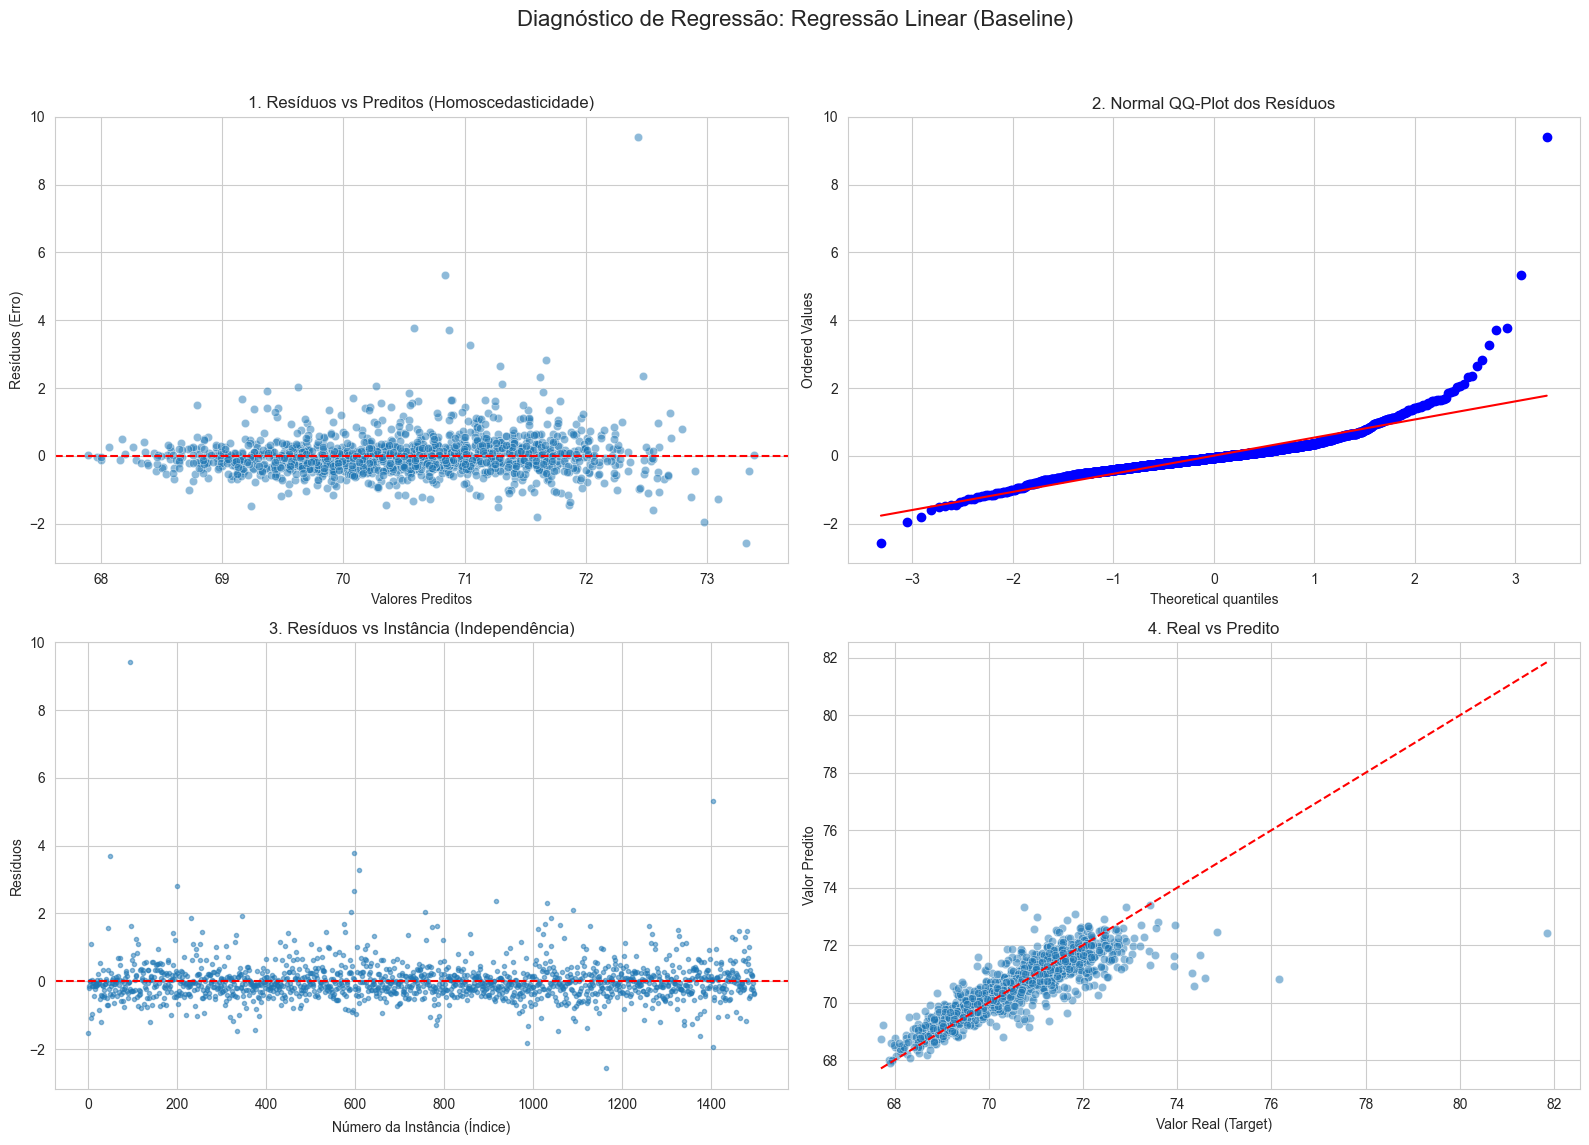

In [36]:
import scipy.stats as stats
from sklearn.utils import resample
def plot_regression_diagnostics(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Diagnóstico de Regressão: {model_name}', fontsize=16)
    
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[0, 0], alpha=0.5)
    axes[0, 0].axhline(0, color='red', linestyle='--')
    axes[0, 0].set_xlabel('Valores Preditos')
    axes[0, 0].set_ylabel('Resíduos (Erro)')
    axes[0, 0].set_title('1. Resíduos vs Preditos (Homoscedasticidade)')
    
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('2. Normal QQ-Plot dos Resíduos')
    
    axes[1, 0].plot(residuals.values, marker='o', linestyle='none', alpha=0.5, markersize=3)
    axes[1, 0].axhline(0, color='red', linestyle='--')
    axes[1, 0].set_xlabel('Número da Instância (Índice)')
    axes[1, 0].set_ylabel('Resíduos')
    axes[1, 0].set_title('3. Resíduos vs Instância (Independência)')
    
    sns.scatterplot(x=y_true, y=y_pred, ax=axes[1, 1], alpha=0.5)
    
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--')
    
    axes[1, 1].set_xlabel('Valor Real (Target)')
    axes[1, 1].set_ylabel('Valor Predito')
    axes[1, 1].set_title('4. Real vs Predito')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def calculate_confidence_intervals(y_true, y_pred, metric_func, metric_name, n_bootstraps=1000):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)
    
    # Reset index para garantir alinhamento
    y_true = y_true.reset_index(drop=True)
    y_pred = pd.Series(y_pred)
    
    for i in range(n_bootstraps):
        # Amostragem com reposição
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            continue
            
        score = metric_func(y_true[indices], y_pred[indices])
        # Para RMSE precisamos tirar a raiz quadrada do MSE aqui se a função for MSE
        if metric_name == 'RMSE':
             score = np.sqrt(score)
             
        bootstrapped_scores.append(score)
        
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    
    # IC de 95% (percentis 2.5 e 97.5)
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    mean_score = np.mean(sorted_scores)
    
    return mean_score, confidence_lower, confidence_upper

# Testes Visuais para o Baseline (Regressão Linear)
print("Gerando diagnósticos para Regressão Linear...")
plot_regression_diagnostics(y_test, y_pred_test, "Regressão Linear (Baseline)")

Total de Outliers encontrados (|Z| > 3.0): 18
Top 5 Outliers mais extremos (Índice: Desvio Padrão):


3534    15.628989
2934     8.841517
7344     6.262321
6271     6.156599
6750     5.423169
Name: LapTime_next, dtype: float64

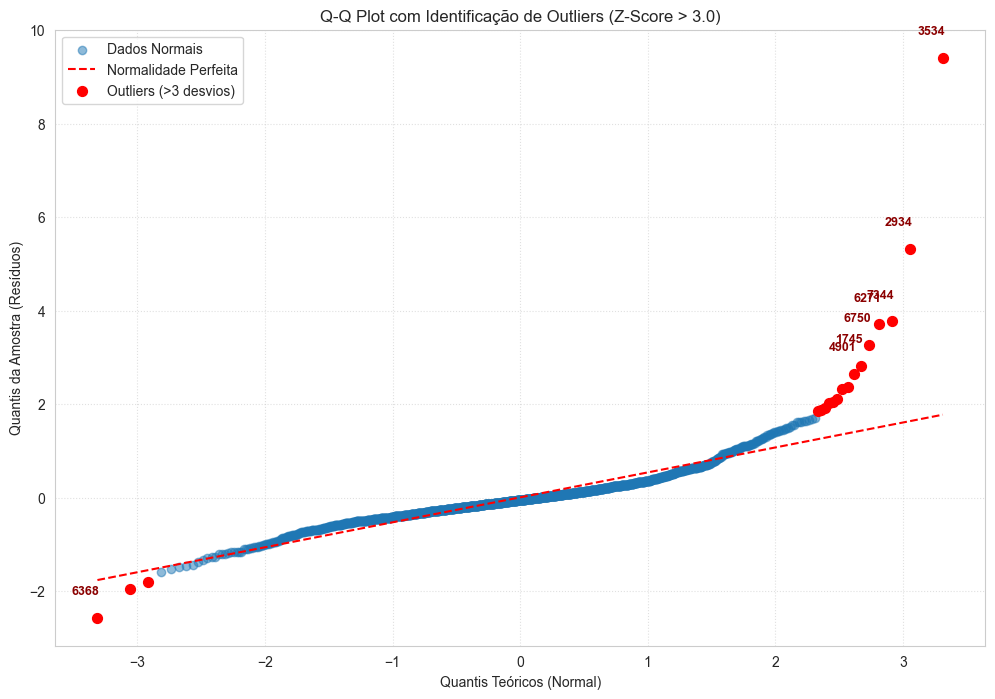

In [37]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

residuals = y_test - y_pred_test 

z_threshold = 3.0 

residuals_standardized = (residuals - residuals.mean()) / residuals.std()

outliers = residuals_standardized[abs(residuals_standardized) > z_threshold]

print(f"Total de Outliers encontrados (|Z| > {z_threshold}): {len(outliers)}")
print("Top 5 Outliers mais extremos (Índice: Desvio Padrão):")
display(outliers.sort_values(key=abs, ascending=False).head(5))

plt.figure(figsize=(12, 8))

(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist="norm", plot=None)

plt.scatter(osm, osr, alpha=0.5, label='Dados Normais')

plt.plot(osm, slope * osm + intercept, color='red', linestyle='--', label='Normalidade Perfeita')

sorted_indices = residuals.argsort()
sorted_residuals = residuals.iloc[sorted_indices]
sorted_standardized = residuals_standardized.iloc[sorted_indices]

mask_outlier = abs(sorted_standardized) > z_threshold
outlier_x = osm[mask_outlier.values]
outlier_y = osr[mask_outlier.values]
outlier_indices = sorted_residuals.index[mask_outlier.values]

plt.scatter(outlier_x, outlier_y, color='red', s=50, label='Outliers (>3 desvios)', zorder=5)

for i in range(len(outlier_x)):
    if abs(outlier_y[i]) > (residuals.std() * 4): 
        plt.text(outlier_x[i] - 0.2, outlier_y[i] + 0.5, 
                 str(outlier_indices[i]), 
                 fontsize=9, color='darkred', fontweight='bold')

plt.title(f'Q-Q Plot com Identificação de Outliers (Z-Score > {z_threshold})')
plt.xlabel('Quantis Teóricos (Normal)')
plt.ylabel('Quantis da Amostra (Resíduos)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

Aplicando filtro de outliers (Next vs. Média Recente)...


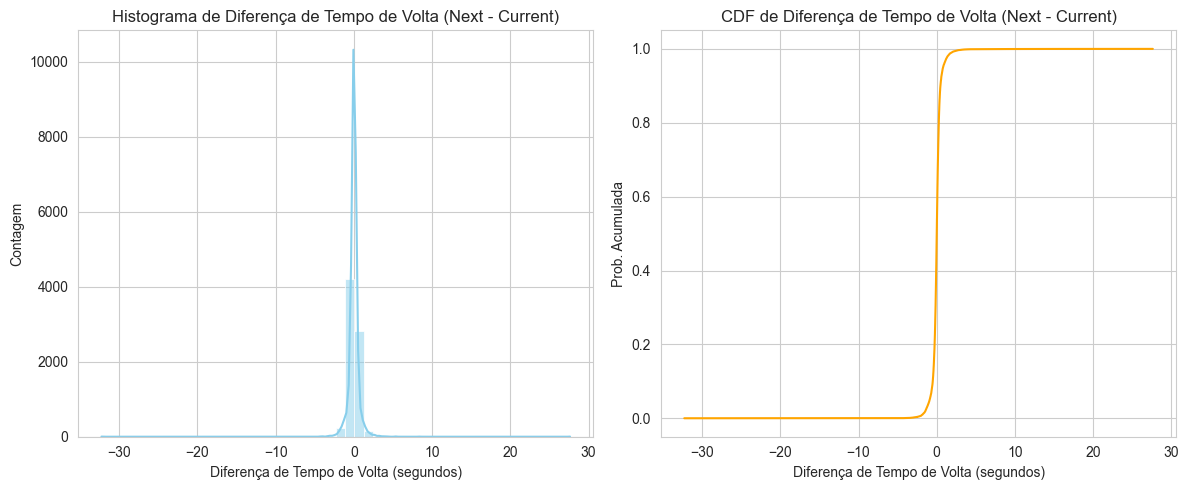

In [38]:
print("Aplicando filtro de outliers (Next vs. Média Recente)...")

laps_with_weather['laps_diff'] = laps_with_weather['LapTime_next'] - laps_with_weather['LapTime_seconds']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(laps_with_weather['laps_diff'].dropna(), kde=True, bins=50, color='skyblue')
plt.title('Histograma de Diferença de Tempo de Volta (Next - Current)')
plt.xlabel('Diferença de Tempo de Volta (segundos)')
plt.ylabel('Contagem')
plt.subplot(1, 2, 2)
sorted_diff = np.sort(laps_with_weather['laps_diff'].dropna())
cdf_vals = np.arange(1, len(sorted_diff)+1) / len(sorted_diff)
plt.plot(sorted_diff, cdf_vals, color='orange')
plt.title('CDF de Diferença de Tempo de Volta (Next - Current)')
plt.xlabel('Diferença de Tempo de Volta (segundos)')
plt.ylabel('Prob. Acumulada')
plt.tight_layout()
plt.show()

In [39]:
z_threshold = 2.0
mask_clean = laps_with_weather['laps_diff'].abs() <= z_threshold 

laps_cleaned = laps_with_weather[mask_clean].copy()

print(f"Total original: {len(laps_with_weather)}")
print(f"Total após filtro: {len(laps_cleaned)}")
print(f"Outliers removidos (Voltas lentas/Pit In): {len(laps_with_weather) - len(laps_cleaned)}")


print("\nPreparando dados para Regressão Linear (Baseline)...")
X_base = laps_cleaned[num_cols + cat_cols].copy()
y = laps_cleaned[target_col].copy()

valid_indices = y.dropna().index
X_base = X_base.loc[valid_indices]
y = y.loc[valid_indices]

X_encoded = pd.get_dummies(X_base, columns=cat_cols, drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

print(f"Shape final de X: {X_scaled.shape}")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Treinando Regressão Linear...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_test = model_lr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n--- RESULTADOS DO BASELINE (Dados Filtrados) ---")
print(f"RMSE (Erro Médio Quadrático): {rmse_test:.4f} segundos")
print(f"MAE (Erro Médio Absoluto):    {mae_test:.4f} segundos")
print(f"R² (Coef. de Determinação):   {r2_test:.4f}")

coefs = pd.DataFrame({'Feature': X_scaled.columns, 'Coef': model_lr.coef_})
coefs['Abs_Coef'] = coefs['Coef'].abs()
print("\nVariáveis Mais Impactantes (Top 10):")
display(coefs.sort_values(by='Abs_Coef', ascending=False).head(10))

Total original: 7798
Total após filtro: 7375
Outliers removidos (Voltas lentas/Pit In): 423

Preparando dados para Regressão Linear (Baseline)...
Shape final de X: (7375, 55)
Treinando Regressão Linear...

--- RESULTADOS DO BASELINE (Dados Filtrados) ---
RMSE (Erro Médio Quadrático): 0.4512 segundos
MAE (Erro Médio Absoluto):    0.3135 segundos
R² (Coef. de Determinação):   0.8305

Variáveis Mais Impactantes (Top 10):


,Feature,Coef,Abs_Coef
8,LapTime_seconds,0.800777,0.800777
1,LapNumber,-0.175430,0.175430
0,TyreLife,0.090546,0.090546
4,TrackTemp_RBF_Median,0.084604,0.084604
48,Team_Mercedes,-0.063976,0.063976
52,pirelliCompound_C3,0.063907,0.063907
53,pirelliCompound_C4,0.057471,0.057471
46,Team_Kick Sauber,0.055224,0.055224
44,Team_Ferrari,-0.049184,0.049184
40,Driver_VER,-0.047324,0.047324


Gerando diagnósticos para Regressão Linear...


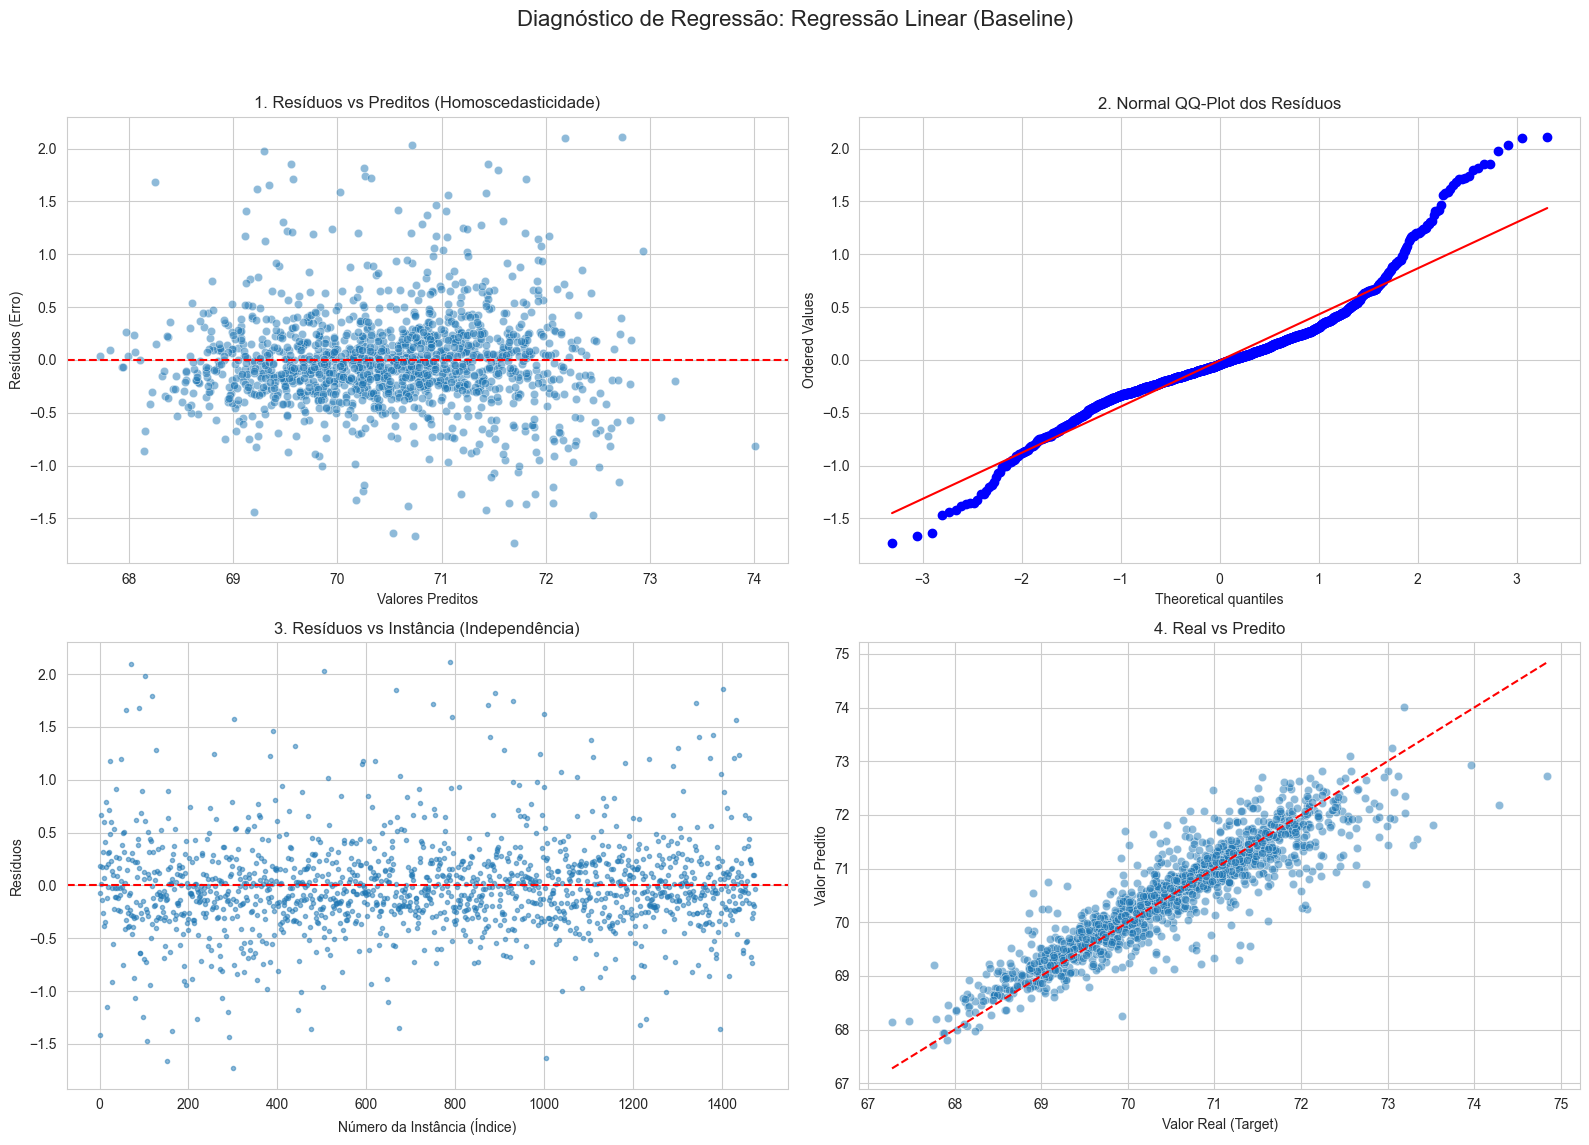

In [40]:
# Testes Visuais para o Baseline (Regressão Linear)
print("Gerando diagnósticos para Regressão Linear...")
plot_regression_diagnostics(y_test, y_pred_test, "Regressão Linear (Baseline)")

In [41]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Gerando Relatório Estatístico Completo (OLS)...")

X_train_sm = sm.add_constant(X_train)

if not isinstance(X_train_sm, pd.DataFrame):
    try:
        col_names = ['const'] + list(X_encoded.columns)
        X_train_sm = pd.DataFrame(X_train_sm, columns=col_names)
    except:
        X_train_sm = pd.DataFrame(X_train_sm, columns=['const'] + [f'Feat_{i}' for i in range(X_train_sm.shape[1]-1)])

model_sm = sm.OLS(y_train.values, X_train_sm).fit()

print(model_sm.summary())


Gerando Relatório Estatístico Completo (OLS)...
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     548.4
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                -3505.5
No. Observations:                5900   AIC:                             7123.
Df Residuals:                    5844   BIC:                             7497.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

## Backward Elimination

Fizemos modelos com todas as variavéis, agora vou removendo os grupos e algumas delas para testes.

In [42]:
# Modelo sem Drivers, no statsmodels
X_train_sm_no_drivers = X_train_sm.drop(columns=[col for col in X_train_sm.columns if col.startswith('Driver_')])
model_sm_no_drivers = sm.OLS(y_train.values, X_train_sm_no_drivers).fit()
print("\n--- Modelo OLS sem Pilotos (Drivers) ---")
print(model_sm_no_drivers.summary())



--- Modelo OLS sem Pilotos (Drivers) ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1402.
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                -3579.8
No. Observations:                5900   AIC:                             7204.
Df Residuals:                    5878   BIC:                             7351.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [43]:
# Modelo sem Teams e Drivers, no statsmodels
X_train_sm_no_teams_drivers = X_train_sm_no_drivers.drop(columns=[col for col in X_train_sm_no_drivers.columns if col.startswith('Team_')])
model_sm_no_teams_drivers = sm.OLS(y_train.values, X_train_sm_no_teams_drivers).fit()
print("\n--- Modelo OLS sem Equipes (Teams) e Pilotos (Drivers) ---")
print(model_sm_no_teams_drivers.summary())


--- Modelo OLS sem Equipes (Teams) e Pilotos (Drivers) ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2350.
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                -3688.3
No. Observations:                5900   AIC:                             7403.
Df Residuals:                    5887   BIC:                             7489.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [44]:
# Modelo sem Drivers, Teams e Pneus, no statsmodels
X_train_sm_no_teams_drivers_tyres = X_train_sm_no_teams_drivers.drop(columns=[col for col in X_train_sm_no_teams_drivers.columns if col.startswith('pirelliCompound_')])
model_sm_no_teams_drivers_tyres = sm.OLS(y_train.values, X_train_sm_no_teams_drivers_tyres).fit()
print("\n--- Modelo OLS sem Equipes (Teams), Pilotos (Drivers) e Pneus (Tyres) ---")
print(model_sm_no_teams_drivers_tyres.summary())


--- Modelo OLS sem Equipes (Teams), Pilotos (Drivers) e Pneus (Tyres) ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3125.
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                -3696.6
No. Observations:                5900   AIC:                             7413.
Df Residuals:                    5890   BIC:                             7480.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [45]:
# Modelo sem Drivers, Teams, Pneus e WindDirection, no statsmodels
X_train_sm_no_teams_drivers_tyres_wind = X_train_sm_no_teams_drivers_tyres.drop(columns=['WindDirection_RBF_Median'])
model_sm_no_teams_drivers_tyres_wind = sm.OLS(y_train.values, X_train_sm_no_teams_drivers_tyres_wind).fit()
print("\n--- Modelo OLS sem Equipes (Teams), Pilotos (Drivers), Pneus (Tyres) e WindDirection ---")
print(model_sm_no_teams_drivers_tyres_wind.summary())


--- Modelo OLS sem Equipes (Teams), Pilotos (Drivers), Pneus (Tyres) e WindDirection ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3515.
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                -3697.1
No. Observations:                5900   AIC:                             7412.
Df Residuals:                    5891   BIC:                             7472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [46]:
# Modelo sem Drivers, Teams, Pneus e Weather, no statsmodels
X_train_sm_no_teams_drivers_tyres_weather = X_train_sm_no_teams_drivers_tyres.drop(columns=[
    'Humidity_RBF_Median', 'Pressure_RBF_Median', 'TrackTemp_RBF_Median', 'WindSpeed_RBF_Median', 'TempDelta_RBF_Median', 'WindDirection_RBF_Median'
])
model_sm_no_teams_drivers_tyres_weather = sm.OLS(y_train.values, X_train_sm_no_teams_drivers_tyres_weather).fit()
print("\n--- Modelo OLS sem Equipes (Teams), Pilotos (Drivers), Pneus (Tyres) e Variáveis Climáticas ---")
print(model_sm_no_teams_drivers_tyres_weather.summary())


--- Modelo OLS sem Equipes (Teams), Pilotos (Drivers), Pneus (Tyres) e Variáveis Climáticas ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     9008.
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                -3795.8
No. Observations:                5900   AIC:                             7600.
Df Residuals:                    5896   BIC:                             7626.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [47]:
# Modelo so com LapTime_seconds, no statsmodels
X_train_sm_only_laptime = X_train_sm[['const', 'LapTime_seconds']]
model_sm_only_laptime = sm.OLS(y_train.values, X_train_sm_only_laptime).fit()
print("\n--- Modelo OLS apenas com LapTime_seconds ---")
print(model_sm_only_laptime.summary())


--- Modelo OLS apenas com LapTime_seconds ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 2.671e+04
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:                -3824.9
No. Observations:                5900   AIC:                             7654.
Df Residuals:                    5898   BIC:                             7667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [48]:
# Com todas as variaveis, menos LapTime_seconds, no statsmodels
X_train_sm_no_laptime = X_train_sm.drop(columns=['LapTime_seconds'])
model_sm_no_laptime = sm.OLS(y_train.values, X_train_sm_no_laptime).fit()
print("\n--- Modelo OLS sem LapTime_seconds ---")
print(model_sm_no_laptime.summary())


--- Modelo OLS sem LapTime_seconds ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     195.2
Date:                ter, 02 dez 2025   Prob (F-statistic):               0.00
Time:                        11:32:34   Log-Likelihood:                -5828.3
No. Observations:                5900   AIC:                         1.177e+04
Df Residuals:                    5845   BIC:                         1.213e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Talvez o modelo sem LapTime_Seconds para se basear seja mais interessante, pois realmente mostra o peso de inúmeras variáveis, como Pneus, Clima e até mesmo pilotos e equipes.